# COMPANY: SWIFTCHAIN ANALYTICS
# DATA SCIENTIST: Tega Jarikre
# PROJECT DESCRIPTION: Real-World Insights: Optimizing Logistics and Supply Chain Data

## 1. UNDERSTANDING THE PROBLEM
* Write a summary of the potential business impact of delivery delays.
* Examine and describe key variables in the dataset.

### Summary of Potential Business Impact of Delivery Delays

Delivery delays can significantly impact a business across several dimensions. First, they can erode customer trust and satisfaction, leading to negative reviews, cancellations, or lost future sales. Delays also strain customer service teams, who must manage complaints and inquiries, increasing operational costs.

From a financial perspective, delays may result in penalties, refunds, or additional shipping costs, directly affecting profit margins. Supply chain disruptions can lead to inventory imbalances, affecting production schedules or sales cycles. Moreover, repeated delays can damage brand reputation and provide a competitive edge to rivals with more reliable logistics.

In B2B contexts, delays can breach contractual obligations, risking legal exposure or loss of key accounts. In the long term, persistent issues may reduce market share and weaken the company's positioning in its industry.

### Key Variables in the Dataset

1. Shipping Mode: This depends on the options available for shipping (Same day, first class, second class or standard class).
2. Shipping Duration: This is the number of hours betwen when the order was made and when the order was shipped.
3. Order Item Total Amount: This is the total amount of a customer's order.
4. Order Profit Per Order
5. Order Item Discount Rate
6. Profit Per Order
7. Order Item Discount
8. Sales Per Customer
9. Order Item Profit Ratio
10. Category Country 

## 2. EXPLORATORY DATA ANALYSIS (EDA)
* Load the dataset and inspect its structure.
* Generate descriptive statistics for numerical and categorical variables.
* Visualize key relationships (e.g., shipping mode vs. delivery status).
* Identify missing values and propose handling strategies.

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
#Sklearn Libs
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

### Structure of the Data

In [2]:
#Loading the dataset
original_df = pd.read_csv("C:/Users/USER/Downloads/Swiftchain/logistics.csv")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15549 entries, 0 to 15548
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type              15549 non-null  object 
 1   profit_per_order          15549 non-null  float64
 2   sales_per_customer        15549 non-null  float64
 3   category_id               15549 non-null  float64
 4   category_name             15549 non-null  object 
 5   customer_city             15549 non-null  object 
 6   customer_country          15549 non-null  object 
 7   customer_id               15549 non-null  float64
 8   customer_segment          15549 non-null  object 
 9   customer_state            15549 non-null  object 
 10  customer_zipcode          15549 non-null  float64
 11  department_id             15549 non-null  float64
 12  department_name           15549 non-null  object 
 13  latitude                  15549 non-null  float64
 14  longit

In [5]:
original_df.head(20)

payment_type  profit_per_order  sales_per_customer  category_id  \
0         DEBIT         34.448338            92.49099          9.0   
1      TRANSFER         91.193540           181.99008         48.0   
2         DEBIT          8.313806            89.96643         46.0   
3      TRANSFER        -89.463196            99.15065         17.0   
4         DEBIT         44.722590           170.97824         48.0   
5          CASH         76.100400           137.45360         17.0   
6         DEBIT        -54.345290           167.98117         46.0   
7      TRANSFER       -163.628400           120.89000         18.0   
8         DEBIT         29.792816           113.09000         18.0   
9       PAYMENT         12.527968           123.49000         29.0   
10        DEBIT         40.463943           107.89000         18.0   
11      PAYMENT        147.010090           326.84012         45.0   
12        DEBIT         87.027310           290.97644         17.0   
13         CASH         50.661564           193.99000         48.0   
14        DEBIT         34.895645           126.72665         24.0   
15     TRANSFER         80.532870           196.68074         48.0   
16        DEBIT         75.887344           159.99000         29.0   
17        DEBIT         43.940407           109.19000         40.0   
18        DEBIT         40.495990           335.98000         45.0   
19     TRANSFER         47.352356            98.38000         29.0   

           category_name customer_city customer_country  customer_id  \
0       Cardio Equipment        Caguas      Puerto Rico   12097.6830   
1           Water Sports   Albuquerque          EE. UU.    5108.1045   
2   Indoor/Outdoor Games      Amarillo      Puerto Rico    4293.4478   
3                 Cleats        Caguas      Puerto Rico     546.5306   
4           Water Sports       Peabody          EE. UU.    1546.3980   
5            Electronics        Caguas      Puerto Rico    5048.3975   
6   Indoor/Outdoor Games        Caguas      Puerto Rico    7413.2383   
7         Men's Footwear        Caguas      Puerto Rico    6775.2695   
8         Men's Footwear       Hanford          EE. UU.    4784.4346   
9          Shop By Sport        Caguas      Puerto Rico   11880.0990   
10        Men's Footwear        Caguas      Puerto Rico    3338.5322   
11               Fishing        Newark          EE. UU.    1701.7117   
12                Cleats  Fayetteville          EE. UU.    1256.4532   
13          Water Sports        Caguas      Puerto Rico    8478.3690   
14       Women's Apparel        Tucson          EE. UU.   11585.2180   
15          Water Sports        Rialto          EE. UU.    3379.1467   
16         Shop By Sport        Caguas      Puerto Rico    9115.7500   
17           Accessories        Caguas      Puerto Rico    9262.7780   
18               Fishing        Caguas      Puerto Rico    7126.2070   
19         Shop By Sport       Valrico          EE. UU.    3991.4944   

   customer_segment customer_state  customer_zipcode  department_id  \
0          Consumer             PR          725.0000            3.0   
1          Consumer             CA        92745.1600            7.0   
2          Consumer             PR         2457.7297            7.0   
3          Consumer             PR          725.0000            4.0   
4          Consumer             CA        95118.6000            7.0   
5          Consumer             PR          725.0000            3.0   
6         Corporate             PR          725.0000            7.0   
7       Home Office             PR          725.0000            4.0   
8          Consumer             KY        28629.1100            4.0   
9         Corporate             PR          725.0000            5.0   
10        Corporate             PR          725.0000            4.0   
11         Consumer             NJ          725.0000            7.0   
12      Home Office             AZ        78114.9400            4.0   
13        Corporate      

In [6]:
original_df.duplicated().any()

np.False_

In [7]:
features = pd.read_csv("C:/Users/USER/Downloads/Swiftchain/feature_description.csv")

In [8]:
features

variable_name         type  \
0               payment_type  categorical   
1           profit_per_order    numerical   
2         sales_per_customer    numerical   
3                category_id    numerical   
4              category_name         text   
5              customer_city  categorical   
6           customer_country  categorical   
7                customer_id    numerical   
8           customer_segment  categorical   
9             customer_state  categorical   
10          customer_zipcode         text   
11             department_id    numerical   
12           department_name         text   
13                  latitude    numerical   
14                 longitude    numerical   
15                    market  categorical   
16                order_city  categorical   
17             order_country  categorical   
18         order_customer_id    numerical   
19                order_date     datetime   
20                  order_id    numerical   
21    order_item_cardprod_id    numerical   
22       order_item_discount    numerical   
23  order_item_discount_rate    numerical   
24             order_item_id    numerical   
25  order_item_product_price    numerical   
26   order_item_profit_ratio    numerical   
27       order_item_quantity    numerical   
28                     sales    numerical   
29   order_item_total_amount    numerical   
30    order_profit_per_order    numerical   
31              order_region  categorical   
32               order_state  categorical   
33              order_status  categorical   
34           product_card_id    numerical   
35       product_category_id    numerical   
36              product_name         text   
37             product_price    numerical   
38             shipping_date     datetime   
39             shipping_mode  categorical   
40                     label  categorical   

                                          description  
0                            Type of transaction made  
1                           Earnings per order placed  
2          Total sales per customer made per customer  
3                               Product category code  
4                 Description of the product category  
5           City where the customer made the purchase  
6        Country where the customer made the purchase  
7                                         Customer ID  
8   Types of Customers Consumer, Corporate, Home O...  
9   State to which the store where the purchase is...  
10                                   Customer Zipcode  
11                           Department code of store  
12                           Department name of store  
13        Latitude corresponding to location of store  
14       Longitude corresponding to location of store  
15  Market to where the order is delivered: Africa...  
16                      Destination city of the order  
17                   Destination country of the order  
18                                Customer order code  
19                    Date on which the order is made  
20                                         Order code  
21     Product code generated through the RFID reader  
22                          Order item discount value  
23                     Order item discount percentage  
24                                    Order item code  
25                 Price of products without discount  
26                            Order Item Profit Ratio  
27                       Number of products per order  
28                                     Value in sales  
29                             Total amount per order  
30                             Order Profit Per Order  
31  Region of the world where the order is deliver...  
32   State of the region where the order is delivered  
33  Order Status: COMPLETE, PENDING, CLOSED, PENDI...  
34                                       Product code  
35                              Product category code  
36                                       Product nam

In [9]:
original_df.columns

Index(['payment_type', 'profit_per_order', 'sales_per_customer', 'category_id',
       'category_name', 'customer_city', 'customer_country', 'customer_id',
       'customer_segment', 'customer_state', 'customer_zipcode',
       'department_id', 'department_name', 'latitude', 'longitude', 'market',
       'order_city', 'order_country', 'order_customer_id', 'order_date',
       'order_id', 'order_item_cardprod_id', 'order_item_discount',
       'order_item_discount_rate', 'order_item_id', 'order_item_product_price',
       'order_item_profit_ratio', 'order_item_quantity', 'sales',
       'order_item_total_amount', 'order_profit_per_order', 'order_region',
       'order_state', 'order_status', 'product_card_id', 'product_category_id',
       'product_name', 'product_price', 'shipping_date', 'shipping_mode',
       'label'],
      dtype='object')

In [10]:
order_related_features_cols = ['order_customer_id', 'order_region','order_state', 'order_city', 'order_country',
                               'order_id', 'order_item_cardprod_id', 'order_item_discount', 'order_item_discount_rate', 
                               'order_item_id', 'order_item_product_price','order_item_profit_ratio', 
                               'order_item_quantity', 'order_item_total_amount', 'order_profit_per_order',
                               'order_status', 'category_id','category_name', 'department_id', 'department_name']
customer_features_cols = ['customer_city', 'customer_country', 'customer_id', 'customer_segment', 'customer_state', 'customer_zipcode']
logistics_features_cols = ['shipping_mode', 'latitude', 'longitude', 'market', ]
product_features_cols = ['product_card_id', 'product_category_id', 'product_name', 'product_price']
time_based_features_cols = ['shipping_date', 'order_date']
sales_features_cols = ['payment_type', 'profit_per_order', 'sales_per_customer', 'sales']

In [11]:
id_features = ['order_customer_id', 'order_id', 'order_item_cardprod_id', 'order_item_id', 'category_id', 
               'department_id', 'customer_id', 'product_card_id', 'product_category_id']
for col in id_features:
    print('='*50, col,'='*50,)
    print(original_df[col].nunique())
    print(original_df[col].unique())
    print()

================================================== order_customer_id ==================================================
15542
[12073.336  5111.048  4134.765 ...  9485.582  2191.647  6003.662]

================================================== order_id ==================================================
15536
[15081.289  56444.684   7508.5713 ...  9288.491  28437.322  54480.61  ]

================================================== order_item_cardprod_id ==================================================
824
[ 191.       1073.       1014.        365.        403.        627.
 1004.        502.        957.        835.       1363.       1362.
  822.59393   116.       1353.       1360.        885.       1349.1385
  828.       1351.3063   1354.1471   1348.7849    280.82538   567.
 1358.2903    793.        821.        704.949      88.9626    793.04443
  134.        885.7495    803.2542    822.8179   1355.8613   1361.
  124.46393  1349.        269.81528   824.41394   926.        708.8392
 1357.

In [12]:
#Dropping ID columns and retaining product_category_id
df = original_df.drop(columns=['order_customer_id', 'order_id', 'order_item_cardprod_id', 'order_item_id', 'category_id',
                         'department_id', 'customer_id', 'product_card_id'], axis = 1)

In [13]:
df.head()

payment_type  profit_per_order  sales_per_customer         category_name  \
0        DEBIT         34.448338            92.49099      Cardio Equipment   
1     TRANSFER         91.193540           181.99008          Water Sports   
2        DEBIT          8.313806            89.96643  Indoor/Outdoor Games   
3     TRANSFER        -89.463196            99.15065                Cleats   
4        DEBIT         44.722590           170.97824          Water Sports   

  customer_city customer_country customer_segment customer_state  \
0        Caguas      Puerto Rico         Consumer             PR   
1   Albuquerque          EE. UU.         Consumer             CA   
2      Amarillo      Puerto Rico         Consumer             PR   
3        Caguas      Puerto Rico         Consumer             PR   
4       Peabody          EE. UU.         Consumer             CA   

   customer_zipcode department_name   latitude   longitude  market  \
0          725.0000        Footwear  18.359064  -66.370575  Europe   
1        92745.1600        Fan Shop  37.636528 -121.119630   LATAM   
2         2457.7297        Fan Shop  18.294100  -66.037056  Europe   
3          725.0000         Apparel  18.202435  -66.370510   LATAM   
4        95118.6000        Fan Shop  38.719500 -122.319720   LATAM   

     order_city order_country                 order_date  order_item_discount  \
0         Viena       Austria  2015-08-12 00:00:00+01:00            12.623338   
1  Buenos Aires     Argentina  2017-02-10 00:00:00+00:00            16.500000   
2        Burnie        France  2015-01-01 00:00:00+00:00             6.600000   
3     Santa Ana   El Salvador  2017-05-31 00:00:00+01:00            16.942171   
4      Blumenau        Mexico  2015-03-28 00:00:00+00:00            29.990000   

   order_item_discount_rate  order_item_product_price  \
0                      0.13                     99.99   
1                      0.07                    199.99   
2                      0.06                     49.98   
3                      0.16                     59.99   
4                      0.15                    199.99   

   order_item_profit_ratio  order_item_quantity   sales  \
0                     0.41                  1.0   99.99   
1                     0.48                  1.0  199.99   
2                     0.09                  2.0   99.96   
3                    -0.80                  2.0  119.98   
4                     0.27                  1.0  199.99   

   order_item_total_amount  order_profit_per_order     order_region  \
0                 84.99157               32.083145   Western Europe   
1                181.99000               91.235870    South America   
2                 93.81015                6.965549   Western Europe   
3                 99.89060              -95.401400  Central America   
4                171.07587               44.569000  Central America   

                  order_state order_status  product_category_id  \
0                      Vienna     COMPLETE                  9.0   
1                Buenos Aires      PENDING                 48.0   
2  Nord-Pas-de-Calais-Picardy     COMPLETE                 46.0   
3                   Santa Ana   PROCESSING                 17.0   
4                    Illinois     COMPLETE                 48.0   

                        product_name  product_price  \
0  Nike Men's Free 5.0+ Running Shoe          99.99   
1        Pelican Sunstream 100 Kayak         199.99   
2   O'Brien Men's Neoprene Life Vest          49.98   
3   Perfect Fitness Perfect Rip Deck          59.99   
4        Pelican Sunstream 100 Kayak         199.99   

               shipping_date   shipping_mode  label  
0  2015-08-13 00:00:00+01:00  Standard Class     -1  
1  2017-04-09 00:00:00+01:00  Standard Class     -1  
2  2015-03-18 00:00:00+00:00    Second Class      1  
3  2017-03-18 00:00:00+00:00    Second Class      0  
4  2015-03-30 00:00:00+01:00  Standard Class      1

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15549 entries, 0 to 15548
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type              15549 non-null  object 
 1   profit_per_order          15549 non-null  float64
 2   sales_per_customer        15549 non-null  float64
 3   category_name             15549 non-null  object 
 4   customer_city             15549 non-null  object 
 5   customer_country          15549 non-null  object 
 6   customer_segment          15549 non-null  object 
 7   customer_state            15549 non-null  object 
 8   customer_zipcode          15549 non-null  float64
 9   department_name           15549 non-null  object 
 10  latitude                  15549 non-null  float64
 11  longitude                 15549 non-null  float64
 12  market                    15549 non-null  object 
 13  order_city                15549 non-null  object 
 14  order_

In [15]:
#Converting datatypes appropriately
df['customer_zipcode'] = df['customer_zipcode'].astype('object')
df['product_category_id'] = df['product_category_id'].astype('object')
for col in time_based_features_cols:
    df[col] = pd.to_datetime(df[col], utc=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15549 entries, 0 to 15548
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   payment_type              15549 non-null  object             
 1   profit_per_order          15549 non-null  float64            
 2   sales_per_customer        15549 non-null  float64            
 3   category_name             15549 non-null  object             
 4   customer_city             15549 non-null  object             
 5   customer_country          15549 non-null  object             
 6   customer_segment          15549 non-null  object             
 7   customer_state            15549 non-null  object             
 8   customer_zipcode          15549 non-null  object             
 9   department_name           15549 non-null  object             
 10  latitude                  15549 non-null  float64            
 11  longitude      

### Descriptive Analysis

In [17]:
#Separating numerical and categorical features
df_num = df.drop(columns=['latitude', 'longitude']).select_dtypes(include='number')
df_cat = df.drop(columns=['customer_zipcode', 'product_category_id']).select_dtypes(include='object')

In [18]:
df_num.head()

profit_per_order  sales_per_customer  order_item_discount  \
0         34.448338            92.49099            12.623338   
1         91.193540           181.99008            16.500000   
2          8.313806            89.96643             6.600000   
3        -89.463196            99.15065            16.942171   
4         44.722590           170.97824            29.990000   

   order_item_discount_rate  order_item_product_price  \
0                      0.13                     99.99   
1                      0.07                    199.99   
2                      0.06                     49.98   
3                      0.16                     59.99   
4                      0.15                    199.99   

   order_item_profit_ratio  order_item_quantity   sales  \
0                     0.41                  1.0   99.99   
1                     0.48                  1.0  199.99   
2                     0.09                  2.0   99.96   
3                    -0.80                  2.0  119.98   
4                     0.27                  1.0  199.99   

   order_item_total_amount  order_profit_per_order  product_price  label  
0                 84.99157               32.083145          99.99     -1  
1                181.99000               91.235870         199.99     -1  
2                 93.81015                6.965549          49.98      1  
3                 99.89060              -95.401400          59.99      0  
4                171.07587               44.569000         199.99      1

In [19]:
df_cat.head()

payment_type         category_name customer_city customer_country  \
0        DEBIT      Cardio Equipment        Caguas      Puerto Rico   
1     TRANSFER          Water Sports   Albuquerque          EE. UU.   
2        DEBIT  Indoor/Outdoor Games      Amarillo      Puerto Rico   
3     TRANSFER                Cleats        Caguas      Puerto Rico   
4        DEBIT          Water Sports       Peabody          EE. UU.   

  customer_segment customer_state department_name  market    order_city  \
0         Consumer             PR        Footwear  Europe         Viena   
1         Consumer             CA        Fan Shop   LATAM  Buenos Aires   
2         Consumer             PR        Fan Shop  Europe        Burnie   
3         Consumer             PR         Apparel   LATAM     Santa Ana   
4         Consumer             CA        Fan Shop   LATAM      Blumenau   

  order_country     order_region                 order_state order_status  \
0       Austria   Western Europe                      Vienna     COMPLETE   
1     Argentina    South America                Buenos Aires      PENDING   
2        France   Western Europe  Nord-Pas-de-Calais-Picardy     COMPLETE   
3   El Salvador  Central America                   Santa Ana   PROCESSING   
4        Mexico  Central America                    Illinois     COMPLETE   

                        product_name   shipping_mode  
0  Nike Men's Free 5.0+ Running Shoe  Standard Class  
1        Pelican Sunstream 100 Kayak  Standard Class  
2   O'Brien Men's Neoprene Life Vest    Second Class  
3   Perfect Fitness Perfect Rip Deck    Second Class  
4        Pelican Sunstream 100 Kayak  Standard Class

In [20]:
df_num.shape

(15549, 12)

#### Desscriptive analysis of categorical features

In [21]:
#Defining a function for implementing discrete analysis
def discrete_analysis (discrete_data):
    for col_name in discrete_data:
        print('='*40, col_name, '='*40)
        print()
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print(f"Value counts: \n {discrete_data[col_name].value_counts()}")
        print()

In [22]:
#Implementing discrete analysis
discrete_analysis(df_cat)

======================================== payment_type ========================================

count                                 15549
nunique                                   4
unique     [DEBIT, TRANSFER, CASH, PAYMENT]
Name: payment_type, dtype: object
Value counts: 
 payment_type
DEBIT       6148
PAYMENT     3849
TRANSFER    3796
CASH        1756
Name: count, dtype: int64

======================================== category_name ========================================

count                                                  15549
nunique                                                   49
unique     [Cardio Equipment, Water Sports, Indoor/Outdoo...
Name: category_name, dtype: object
Value counts: 
 category_name
Cleats                  2212
Men's Footwear          1931
Women's Apparel         1906
Indoor/Outdoor Games    1657
Fishing                 1426
Water Sports            1391
Camping & Hiking        1127
Shop By Sport           1056
Cardio Equipment        1049
Electron

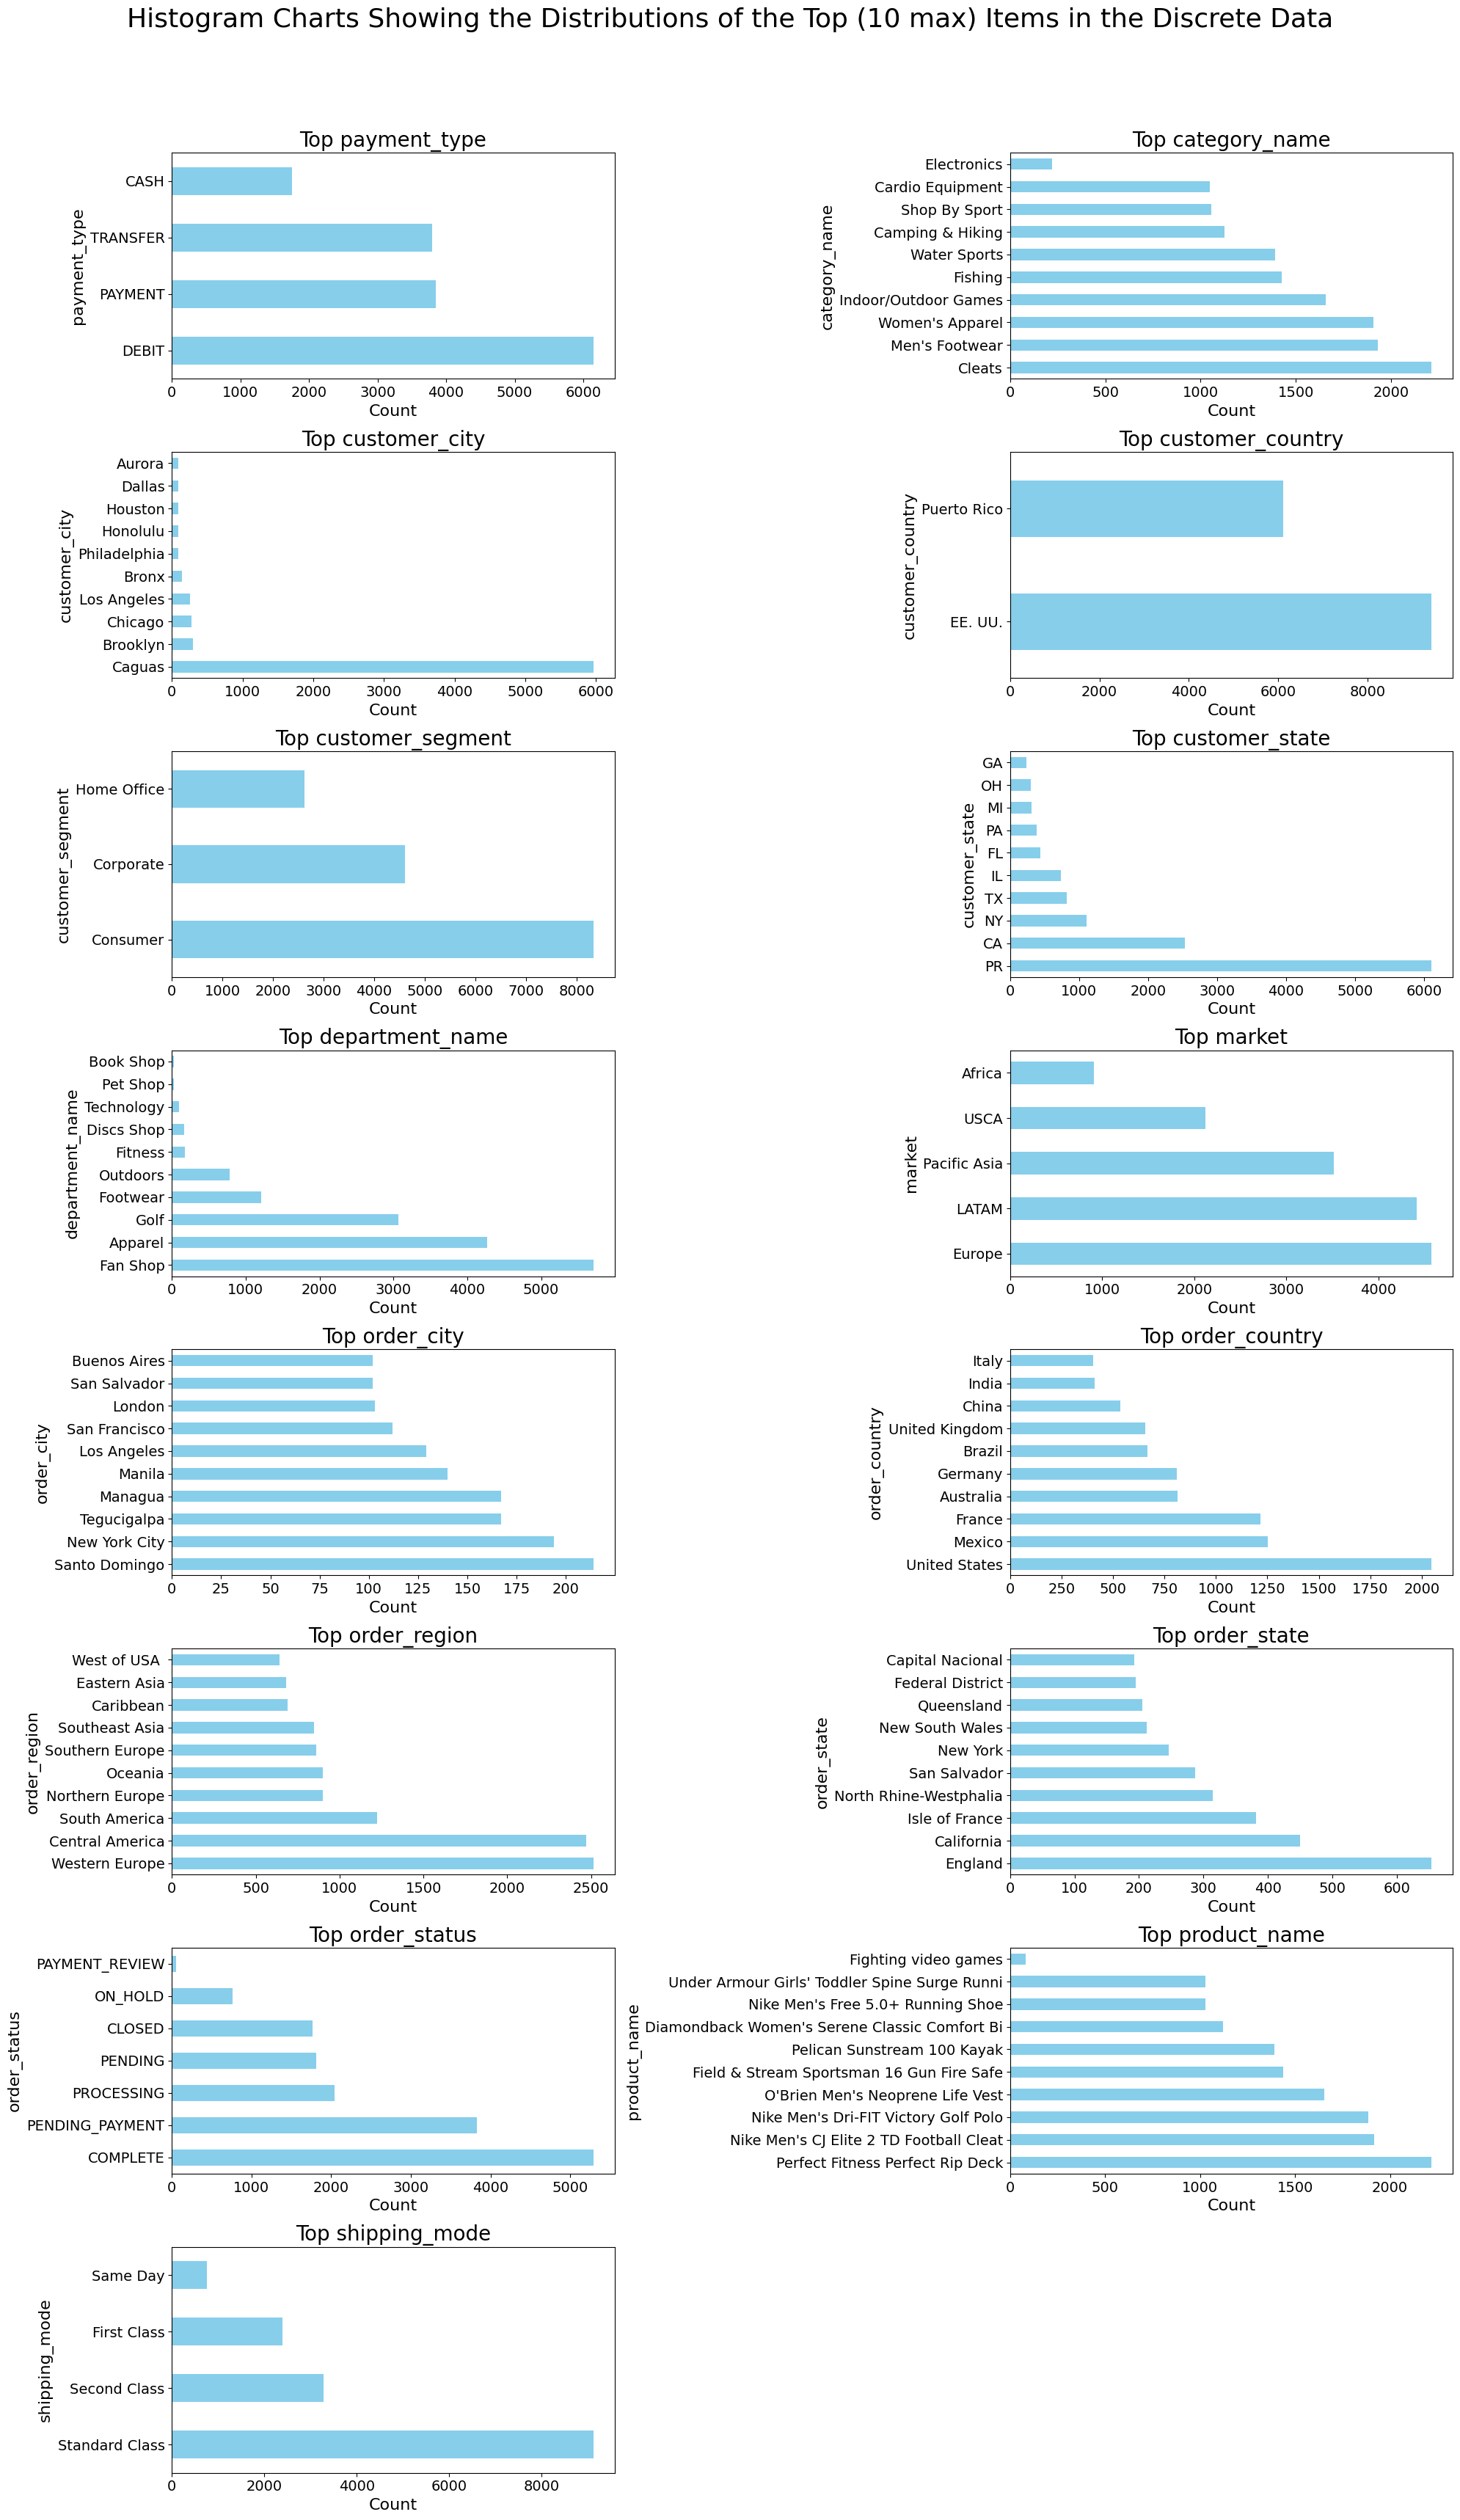

In [23]:
#Visualization
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(20, 35))
fig.suptitle('Histogram Charts Showing the Distributions of the Top (10 max) Items in the Discrete Data', fontsize=26)

axes = axes.flatten()

for i, col in enumerate(df_cat.columns):
    ax=axes[i]
    df_cat[col].value_counts().nlargest(10).plot(kind='barh', ax=ax, color='skyblue')
    ax.set_title(f'Top {col}', fontsize=20)
    ax.set_xlabel('Count', fontsize= 16) 
    ax.set_ylabel(col, fontsize= 16)
    ax.tick_params(axis='both', labelsize=14)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### Desscriptive analysis of numerical features

In [24]:
#Defining a function for analyzing numerical data
def numeric_analysis(numeric_data):
    for col_name in numeric_data:
        print('='*40, col_name, '='*40)
        print(numeric_data[col_name].agg(['min', 'max', 'mean', 'median', 'std']))
        print(f"Skewness of {col_name} = {numeric_data[col_name].skew()}")
        print()

In [51]:
numeric_analysis(df_num)

======================================== profit_per_order ========================================
min      -3442.500000
max        911.800000
mean        22.604542
median      31.693370
std         99.265198
Name: profit_per_order, dtype: float64
Skewness of profit_per_order = -5.805210666899342

======================================== sales_per_customer ========================================
min          8.351162
max       1939.990000
mean       179.888256
median     165.944170
std        113.727323
Name: sales_per_customer, dtype: float64
Skewness of sales_per_customer = 2.7177128581385417

======================================== order_item_discount ========================================
min         0.000000
max       500.000000
mean       20.782118
median     14.588252
std        22.953833
Name: order_item_discount, dtype: float64
Skewness of order_item_discount = 5.376970408142338

======================================== order_item_discount_rate ============================

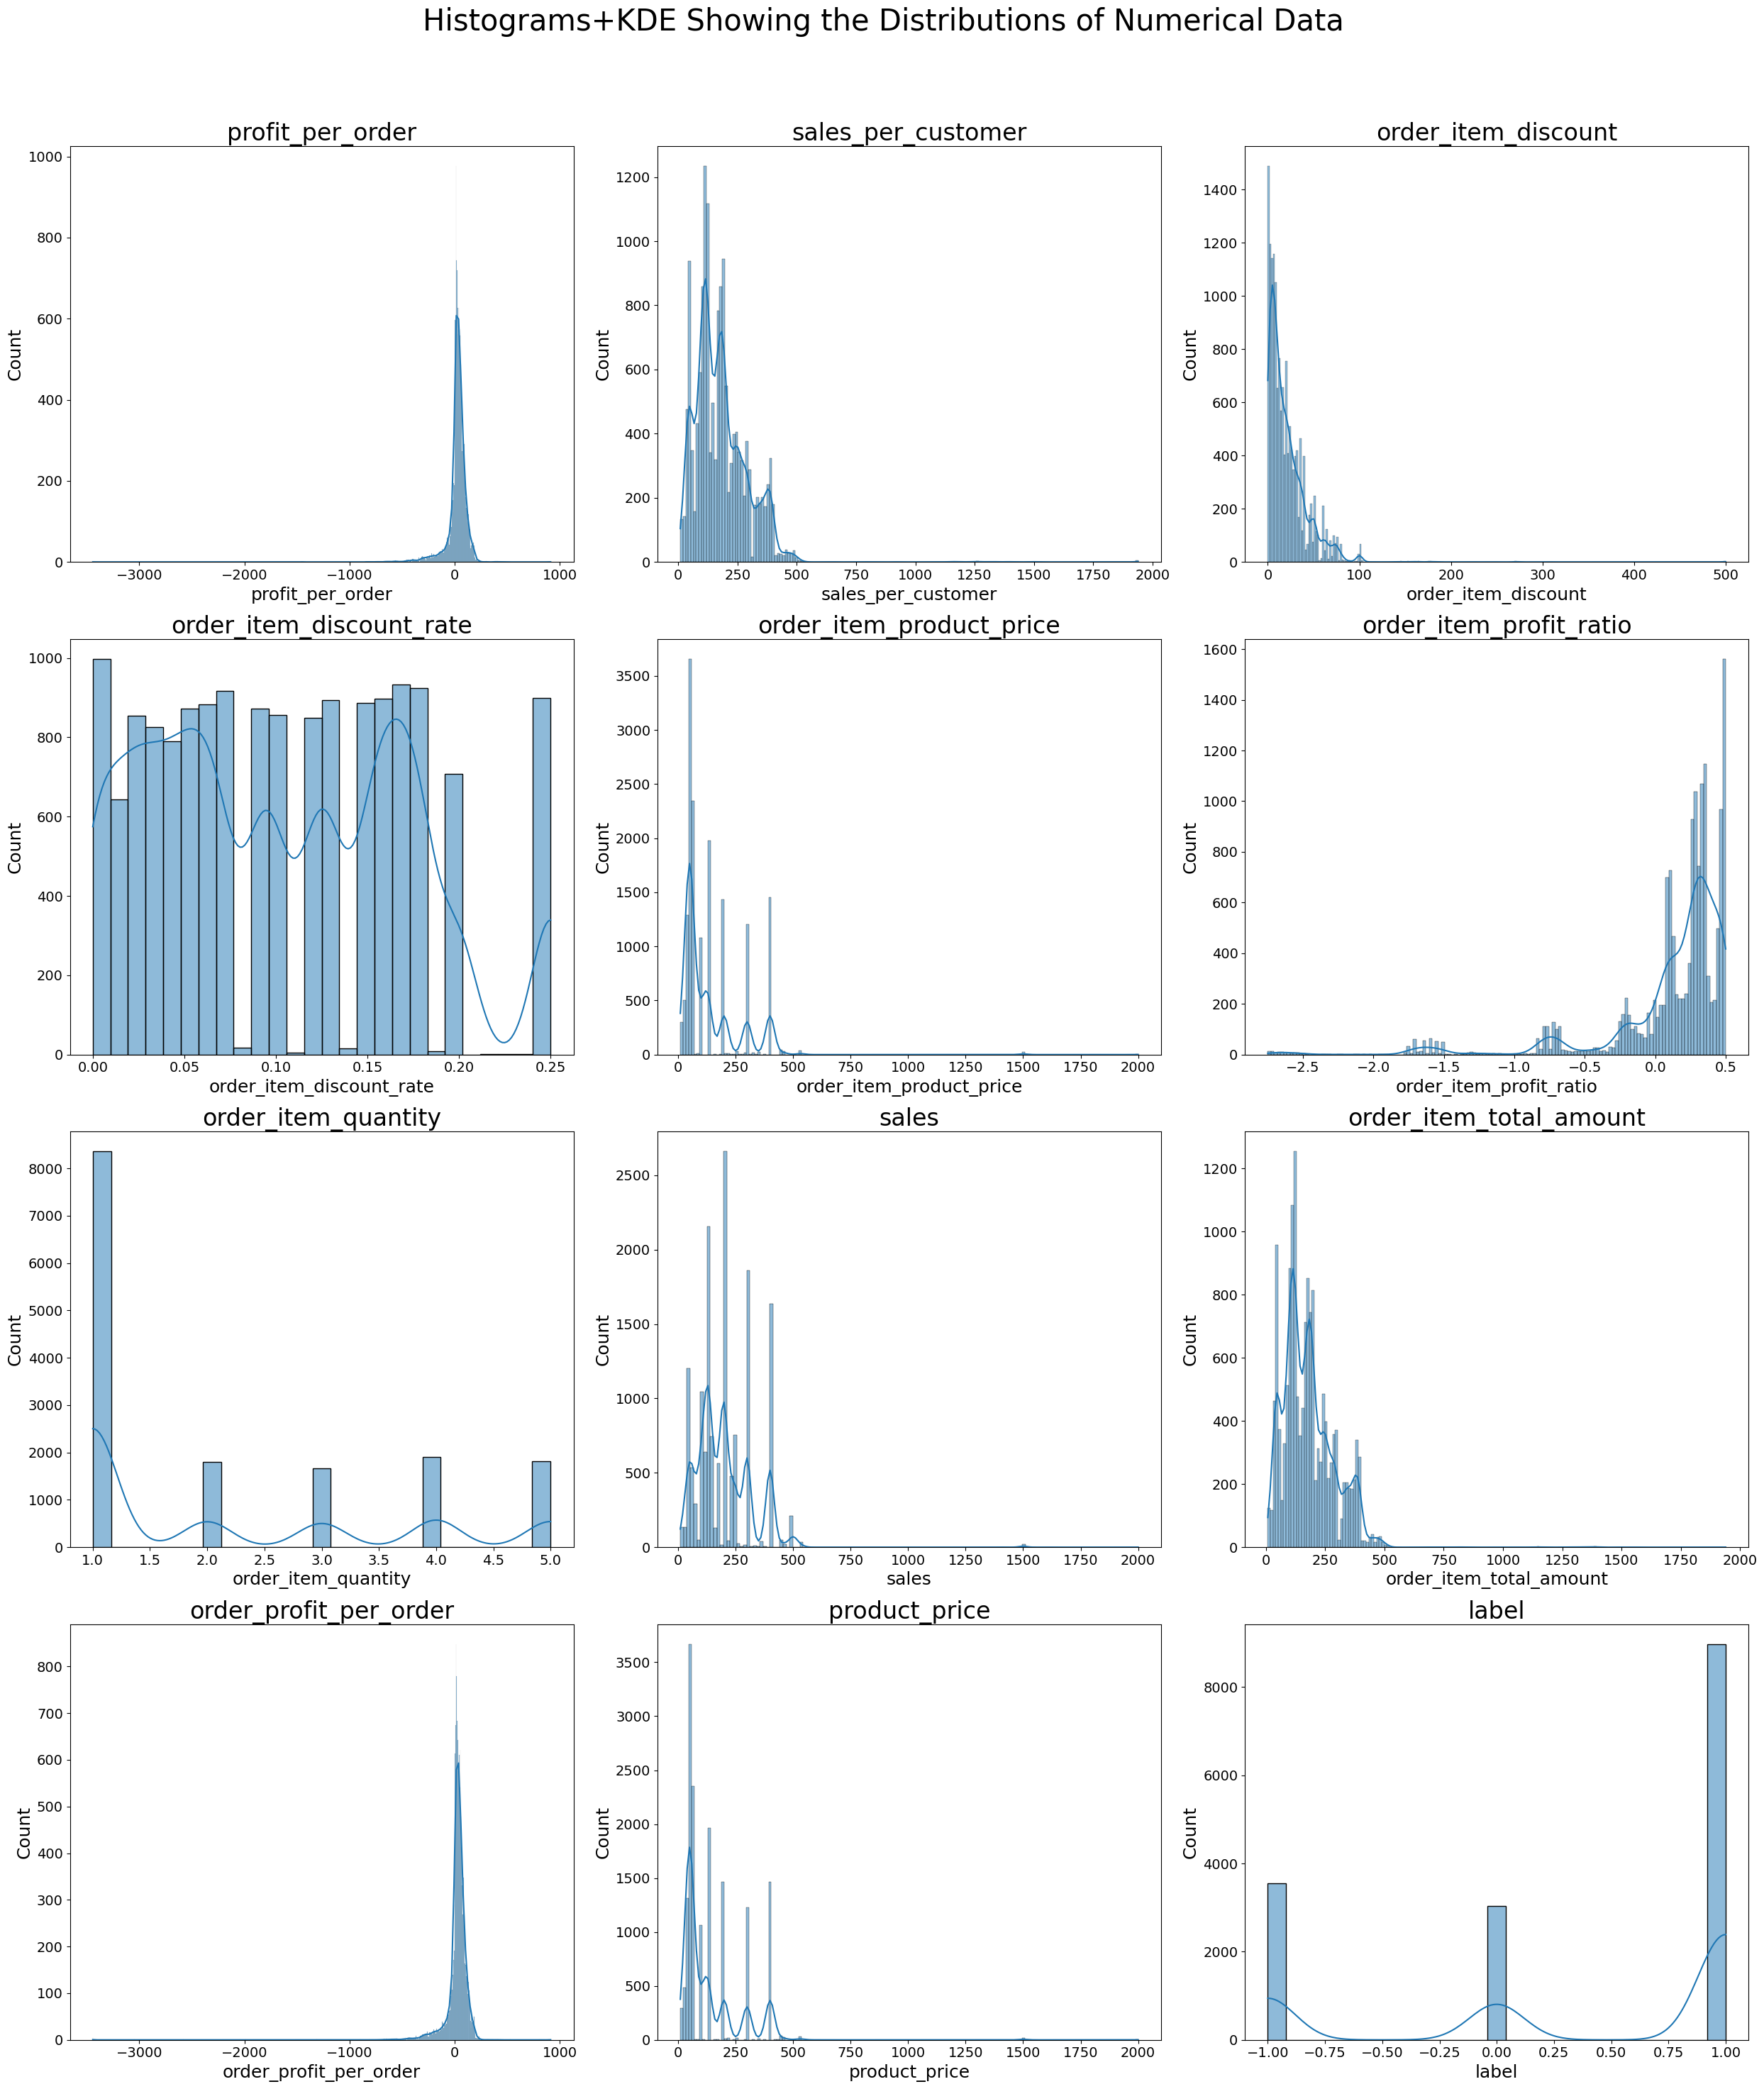

In [25]:
#Visualization
fig, axes = plt.subplots(4, 3, figsize=(25, 30))
fig.suptitle('Histograms+KDE Showing the Distributions of Numerical Data', fontsize=30)

axes = axes.flatten()

for i, col in enumerate(df_num.columns):
    sns.histplot(data = df_num, x=col, ax=axes[i], kde=True)
    axes[i].set_title(col, fontsize=24)
    axes[i].set_ylabel('Count', fontsize=18)
    axes[i].set_xlabel(col, fontsize=18)
    axes[i].tick_params(axis='both', labelsize=14)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [26]:
#Defining a function for performing Pearson Correlation
from scipy import stats
def pearson_test(data1, data2, sig_level):
    stat, p_value = stats.pearsonr(data1, data2)
    print('stat=%.3f, p=%.3f' % (stat, p_value))

    if p_value < sig_level:
        print(f"Reject null: a linear relationship probably exists")
    else:
        print(f"Fail to reject null: probably no linear relationship")

In [27]:
#Separating the target variable from the other numerical columns
other_df_num = df_num.drop(columns=['label'])

In [28]:
#Performing Pearson Correlation test for premium and other numeric columns (bivariate analysis)
for col in other_df_num:
    print(f"{'='*25} Relationship between label and {col} {'='*25}")
    print('Pearson Correlation Test Result:')
    pearson_test(df_num['label'], other_df_num[col], sig_level=0.05)
    print()

========================= Relationship between label and profit_per_order =========================
Pearson Correlation Test Result:
stat=-0.007, p=0.355
Fail to reject null: probably no linear relationship

========================= Relationship between label and sales_per_customer =========================
Pearson Correlation Test Result:
stat=-0.009, p=0.259
Fail to reject null: probably no linear relationship

========================= Relationship between label and order_item_discount =========================
Pearson Correlation Test Result:
stat=-0.003, p=0.669
Fail to reject null: probably no linear relationship

========================= Relationship between label and order_item_discount_rate =========================
Pearson Correlation Test Result:
stat=0.015, p=0.067
Fail to reject null: probably no linear relationship

========================= Relationship between label and order_item_product_price =========================
Pearson Correlation Test Result:
stat=-0.014, p=

### Visualization of Key Relationships Betweeen Target Variable and Other Variables

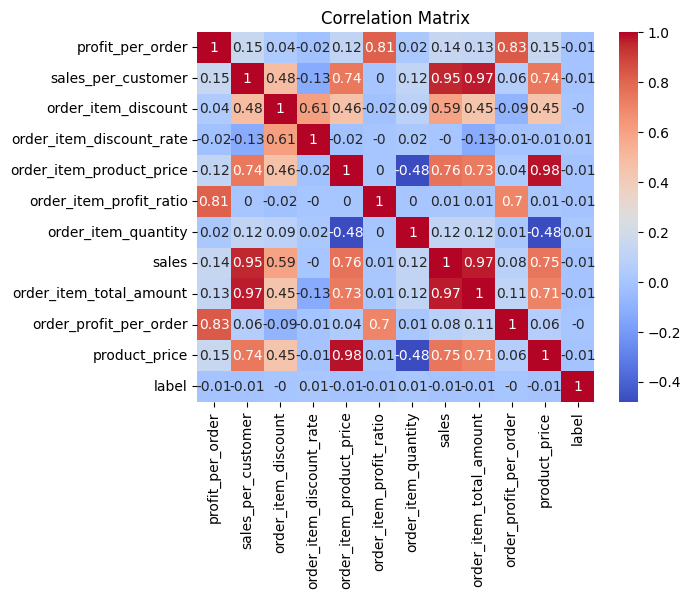

In [29]:
#Correlation matrix involving all numerical columns
corr = round(df_num.corr(),2)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

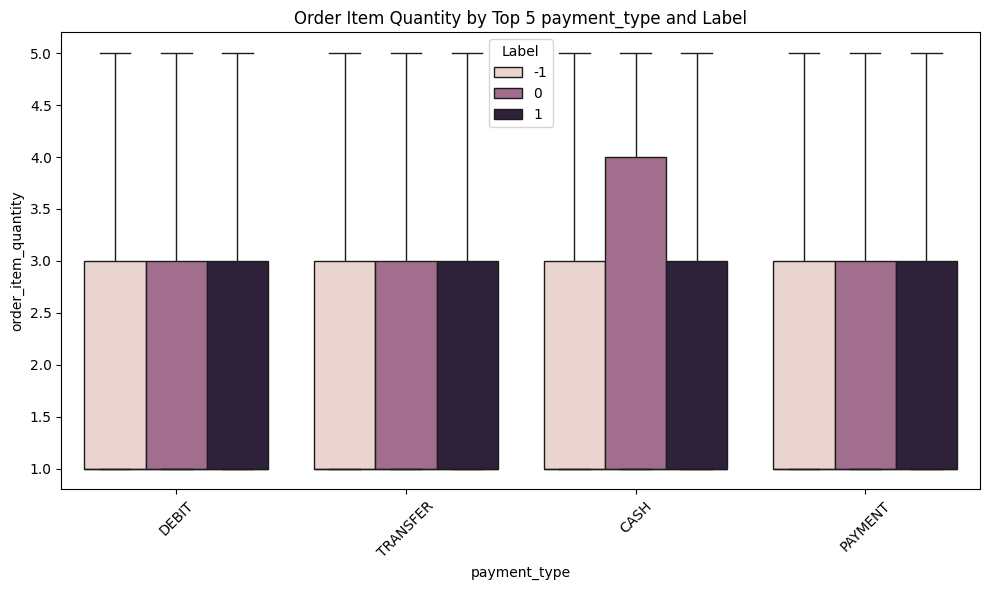

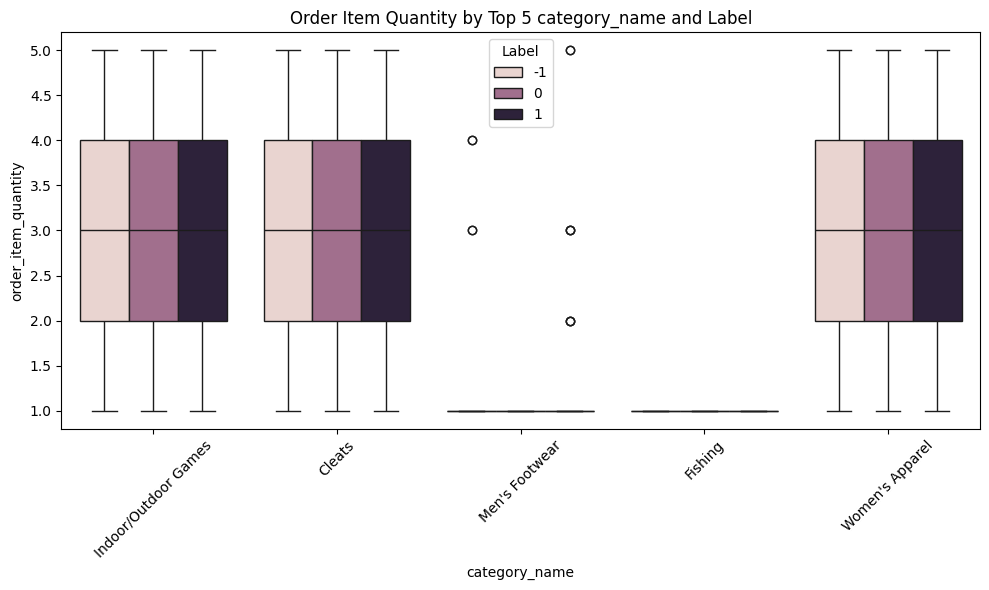

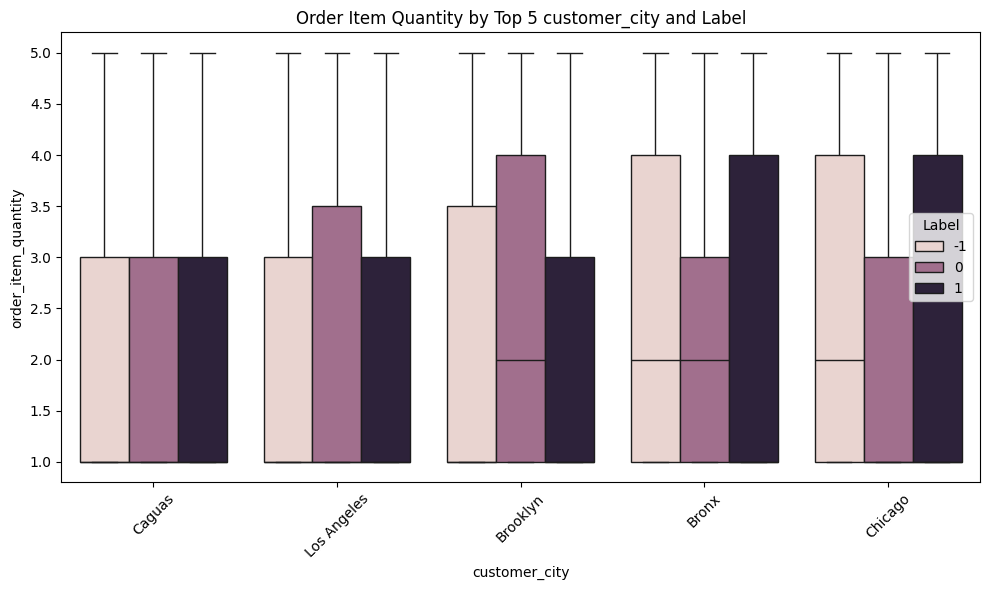

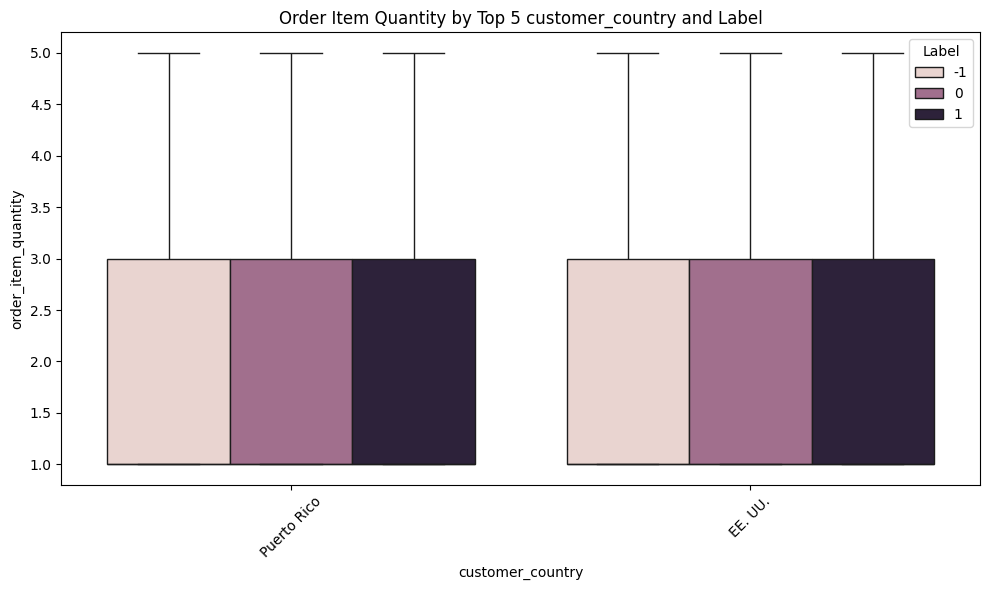

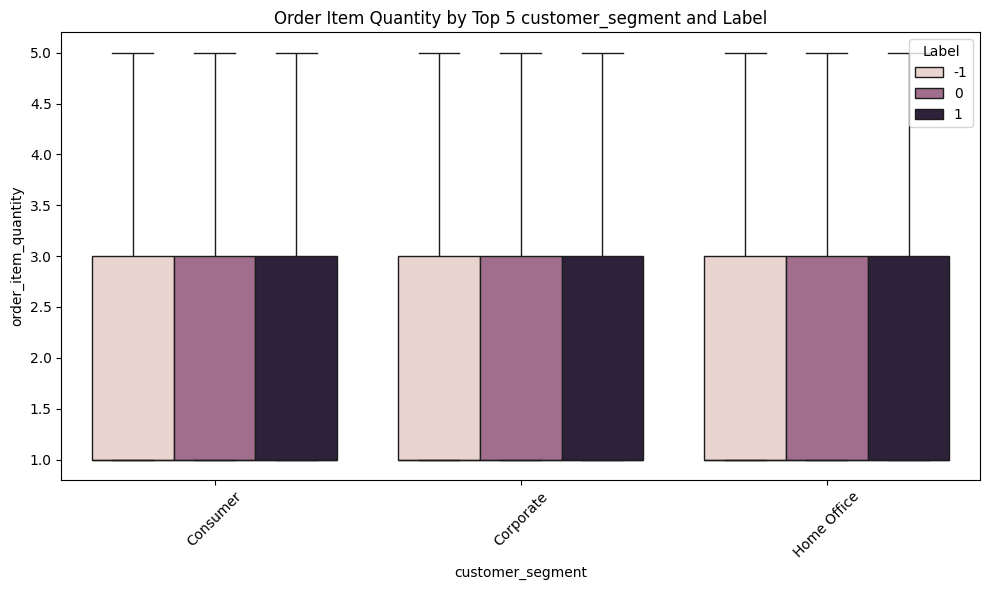

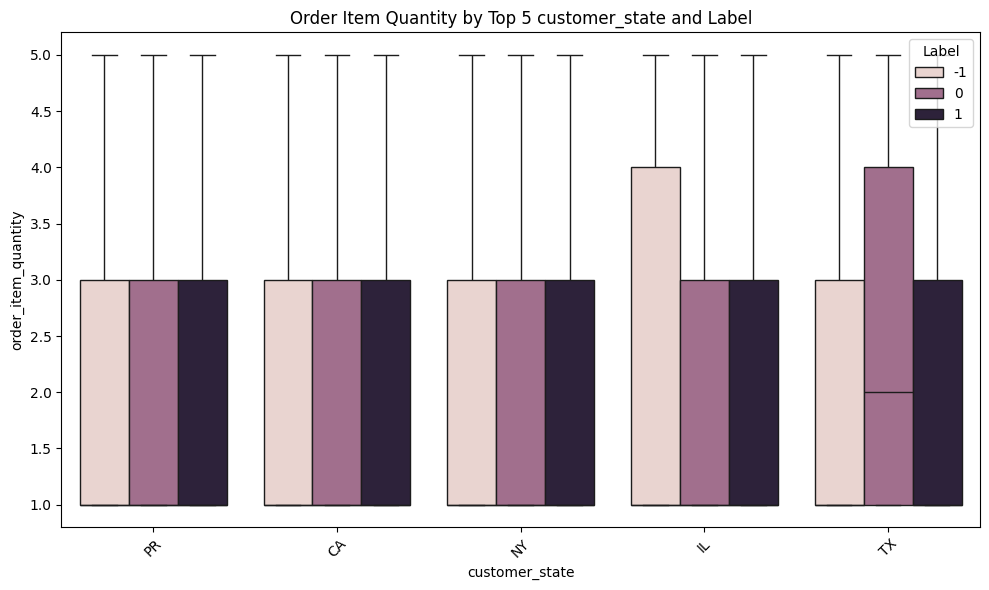

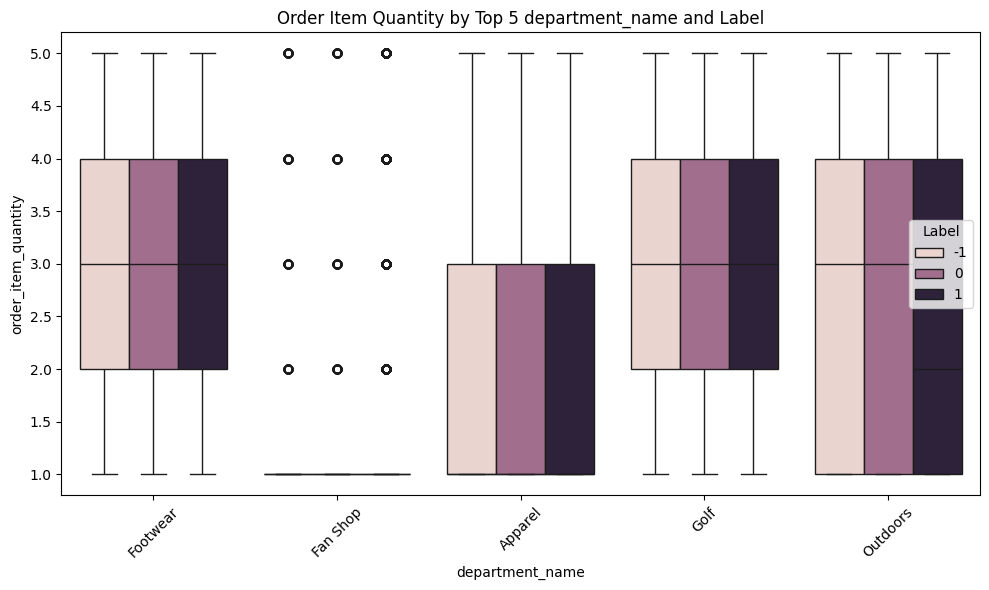

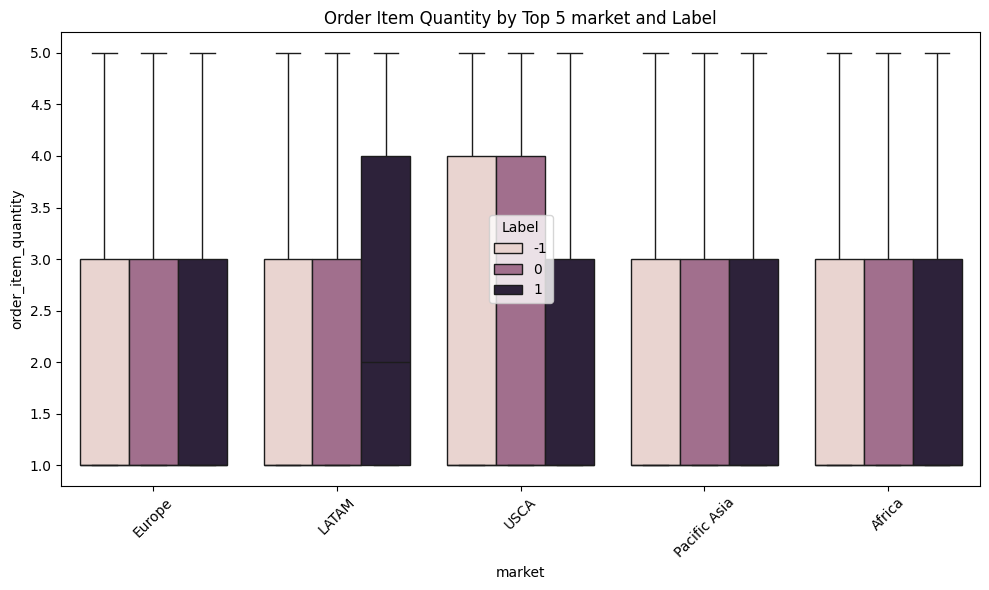

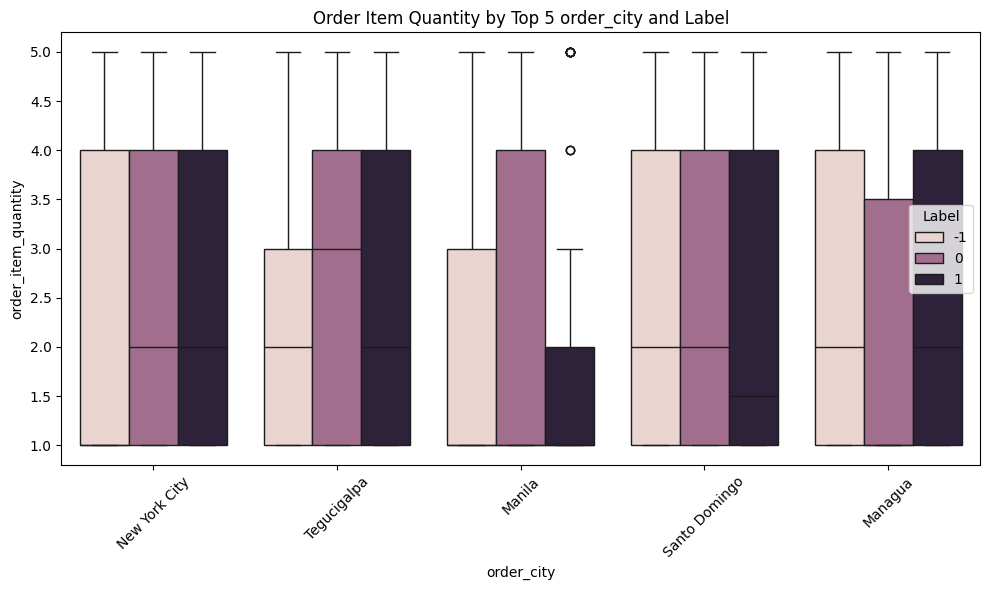

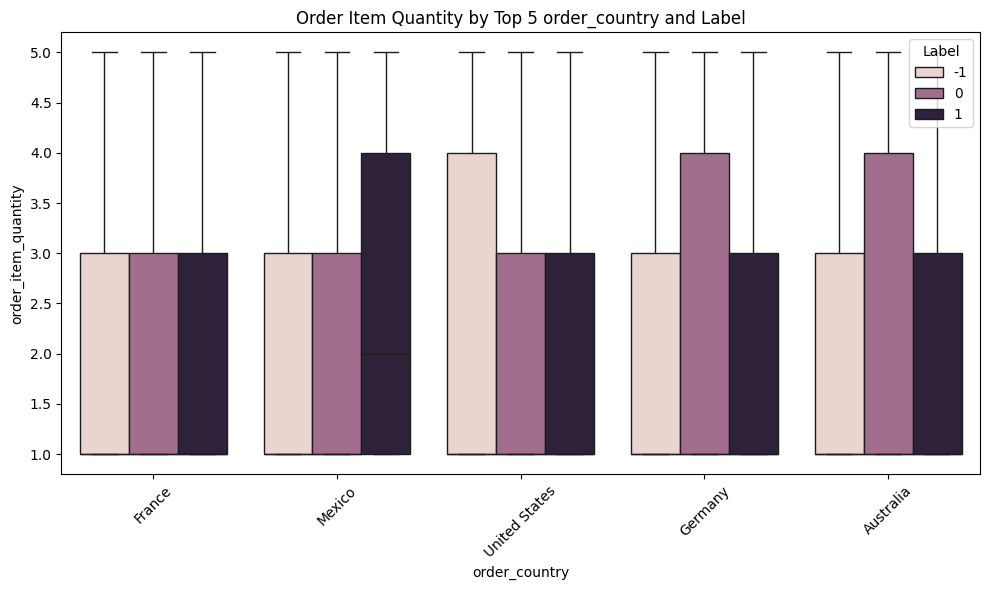

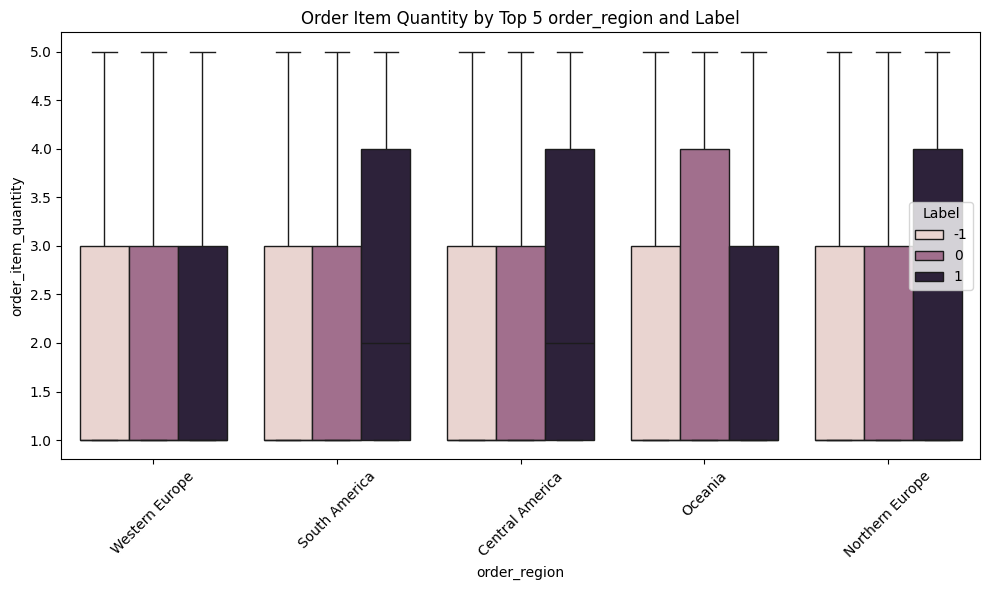

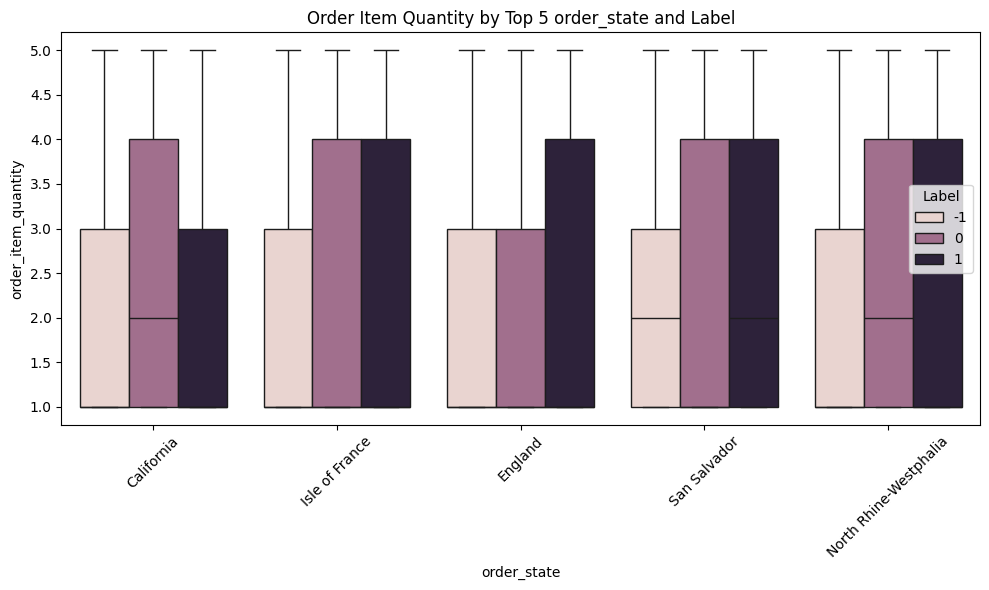

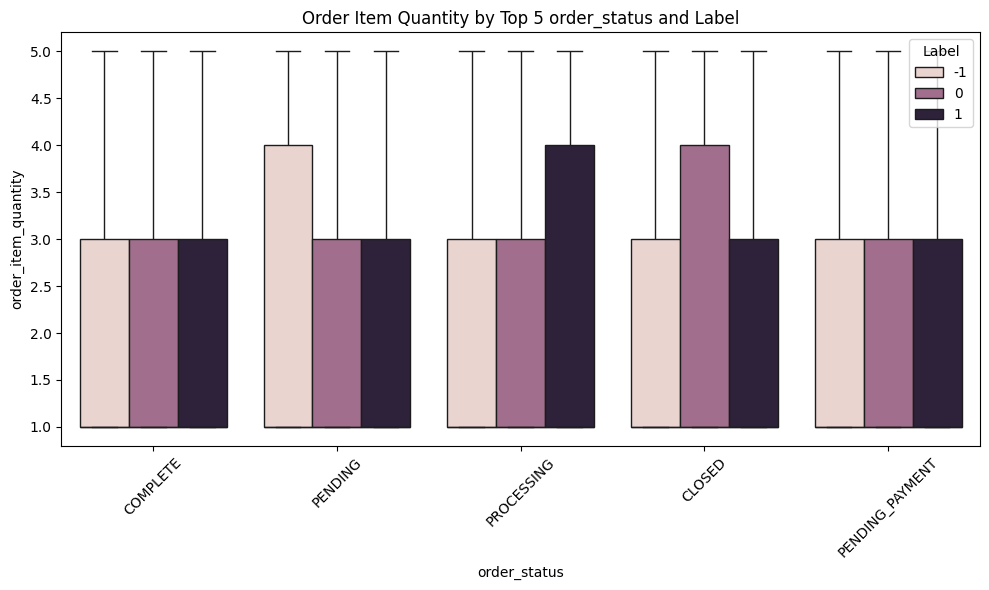

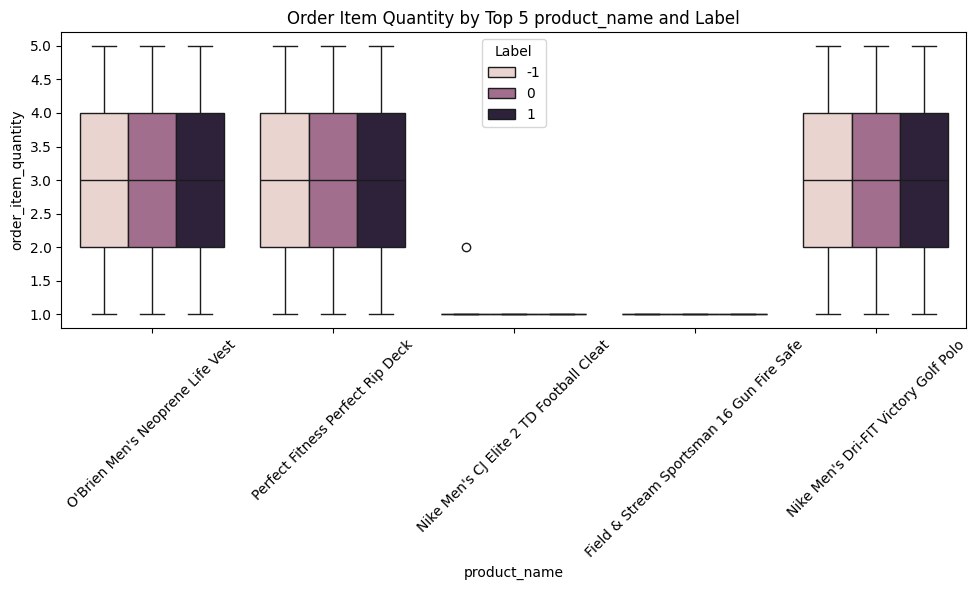

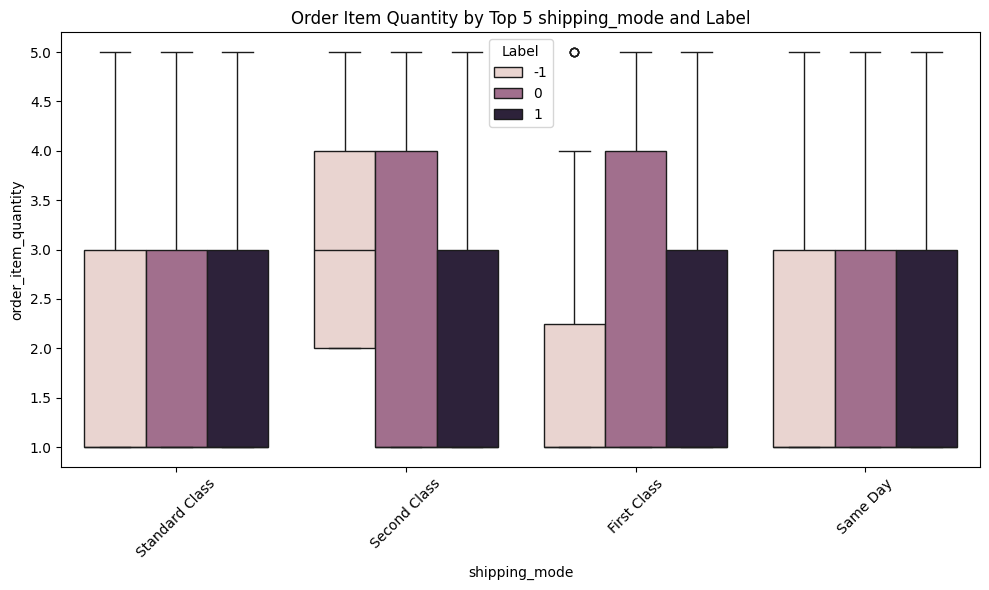

In [30]:
#Visualization of Label by Order Item Quantity and Other Cathegorical Variables
for col in df_cat.columns:
    top_values = df_cat[col].value_counts().nlargest(5).index
    filtered_df = df_cat[df_cat[col].isin(top_values)]
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=filtered_df, x=col, y=df['order_item_quantity'], hue=df['label'])
    plt.title(f'Order Item Quantity by Top 5 {col} and Label')
    plt.xticks(rotation=45)
    plt.legend(title='Label')
    plt.tight_layout()
    plt.show()

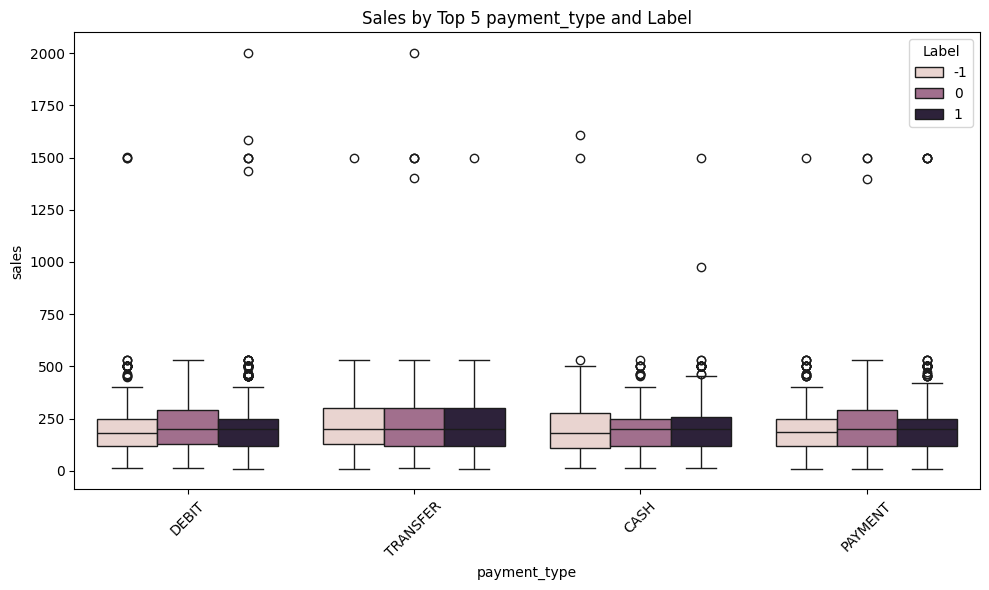

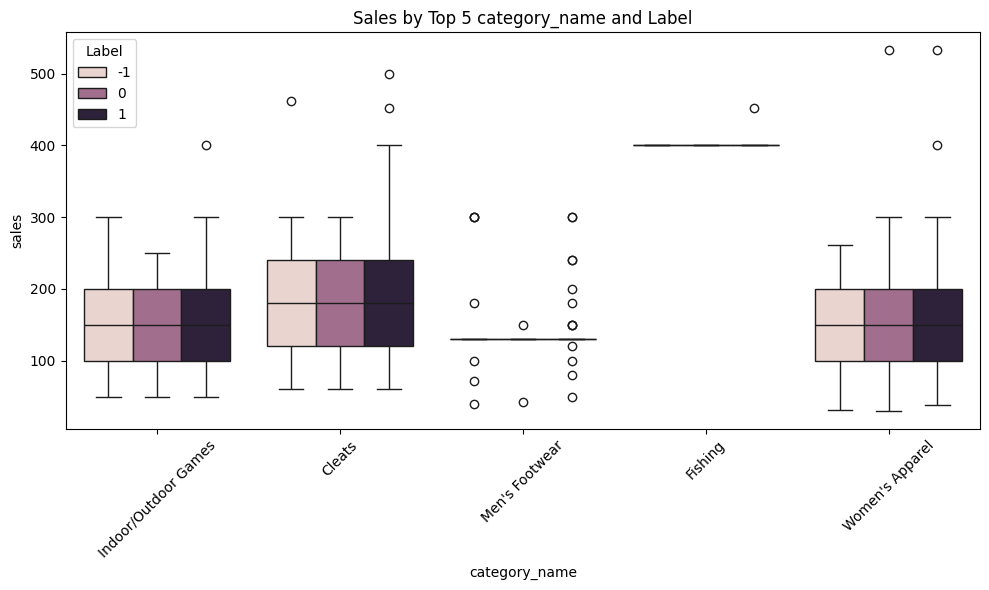

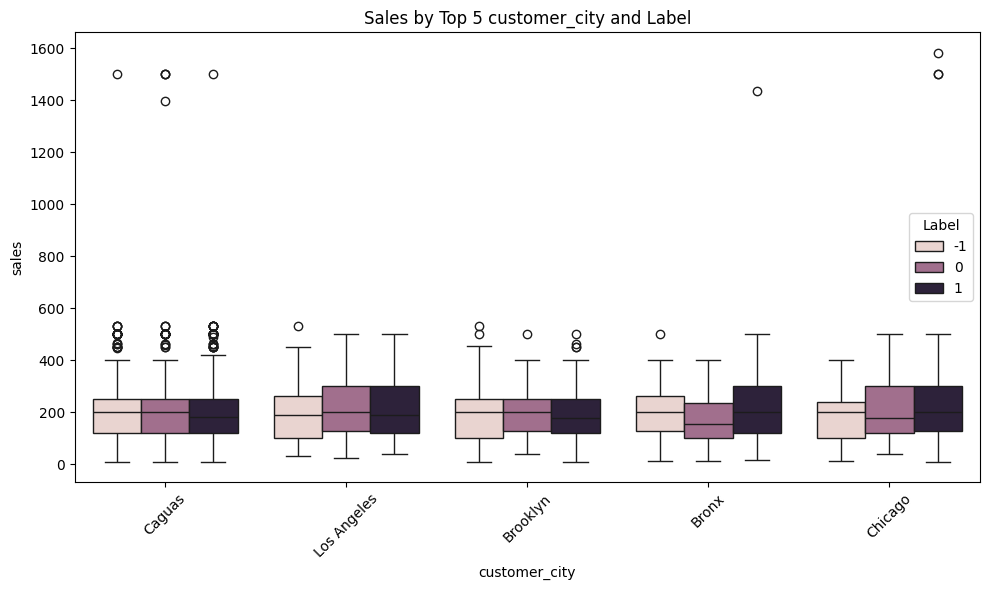

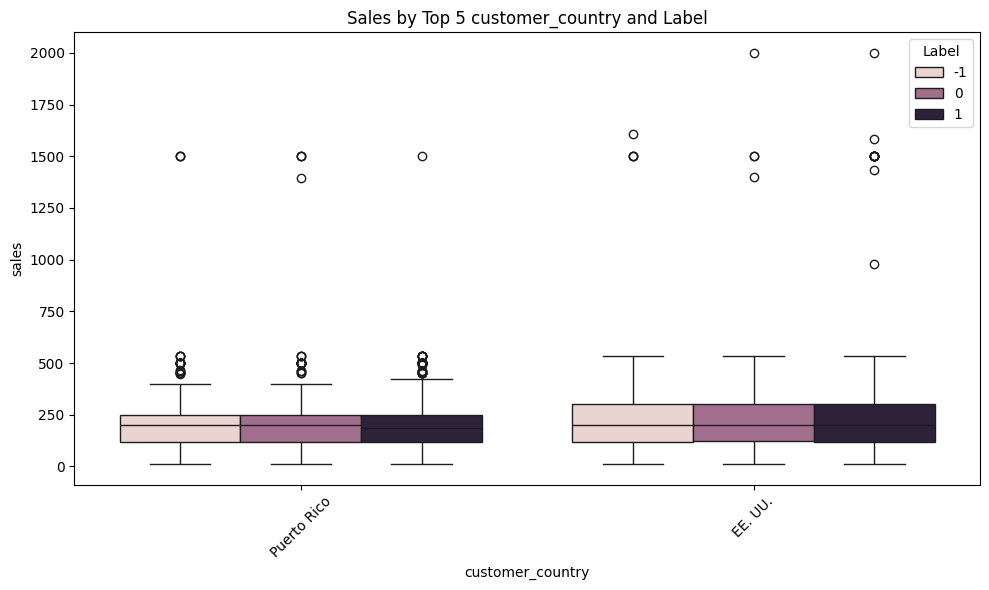

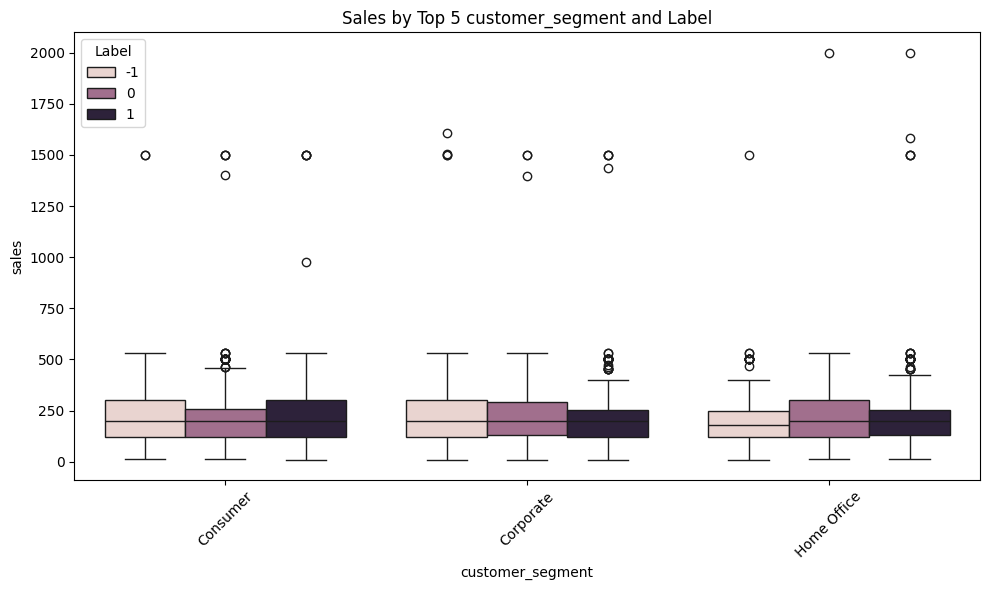

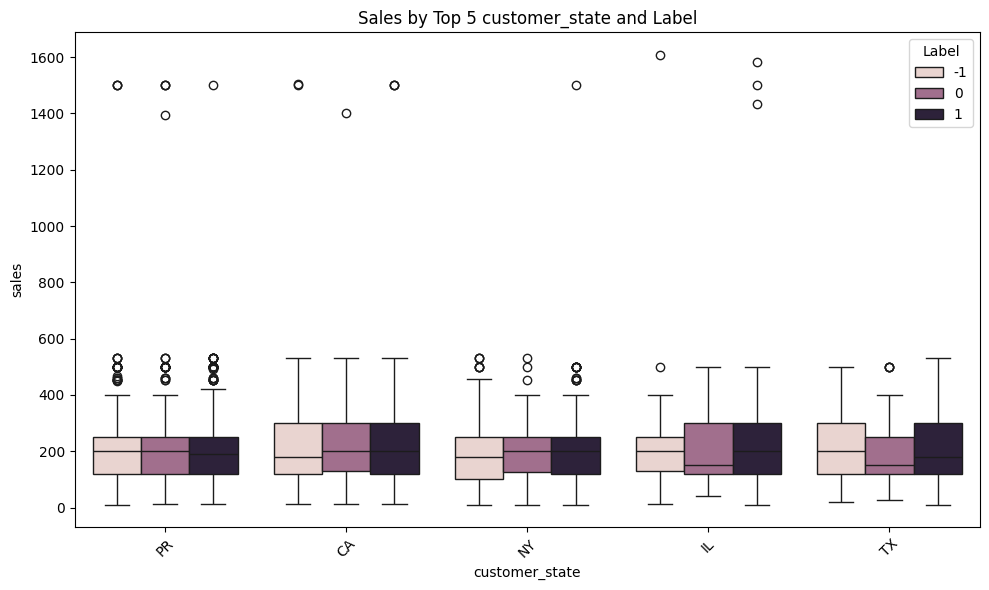

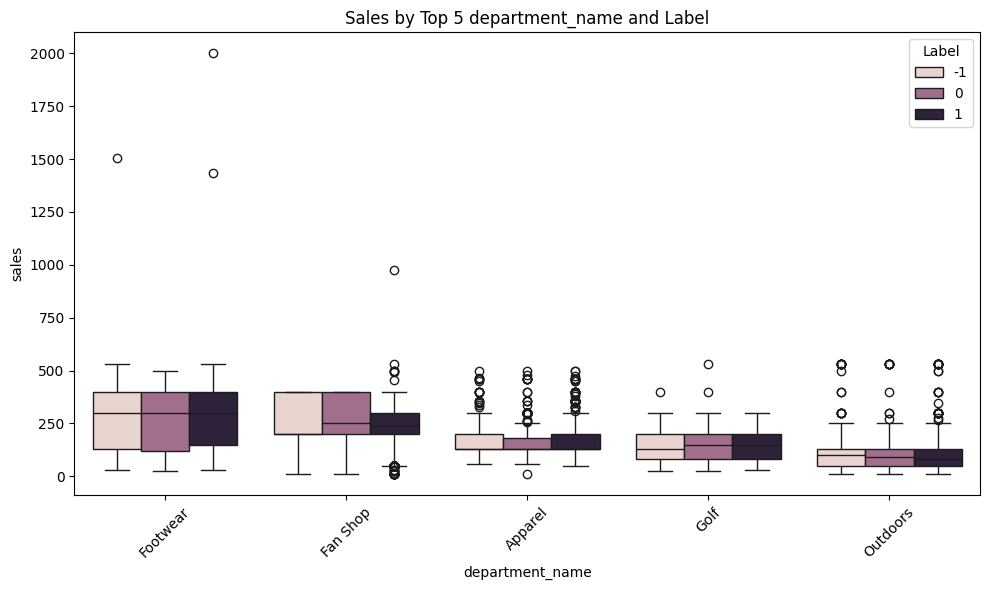

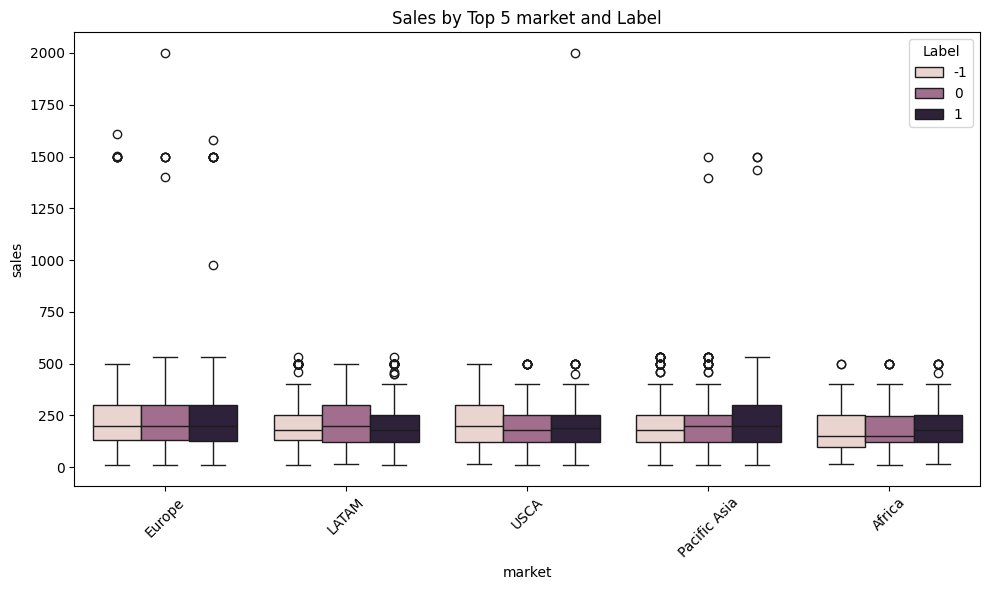

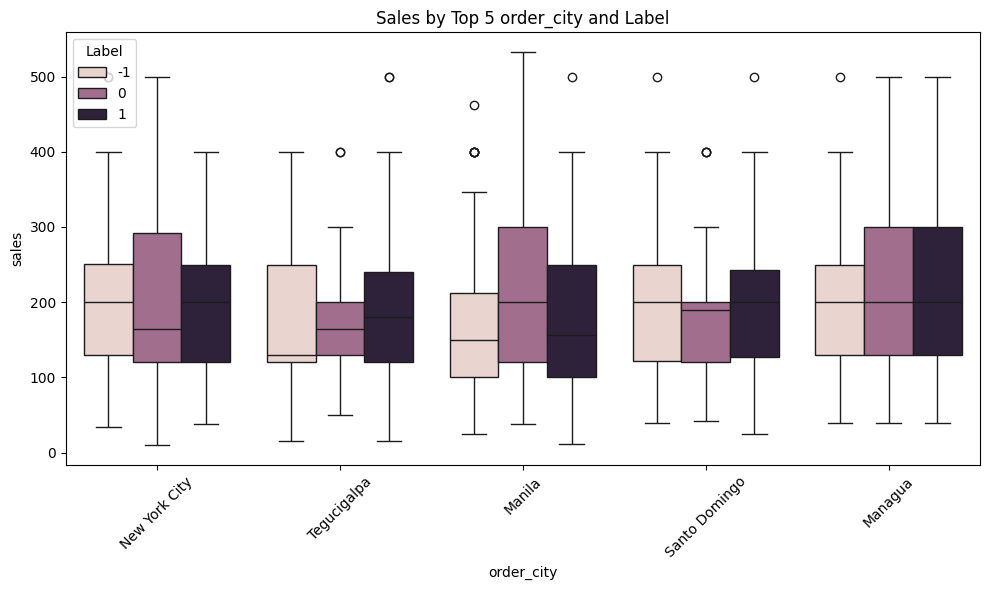

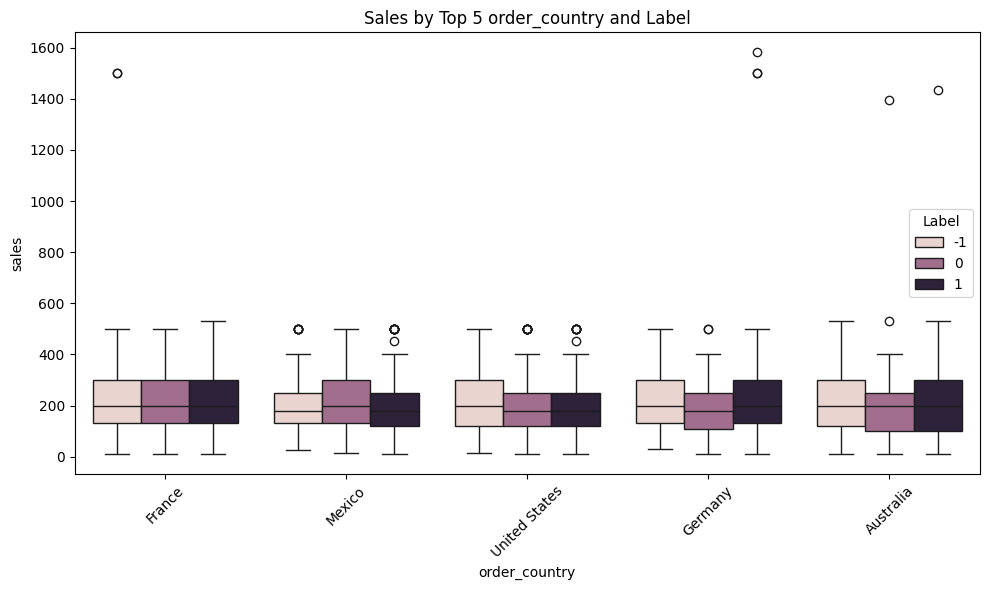

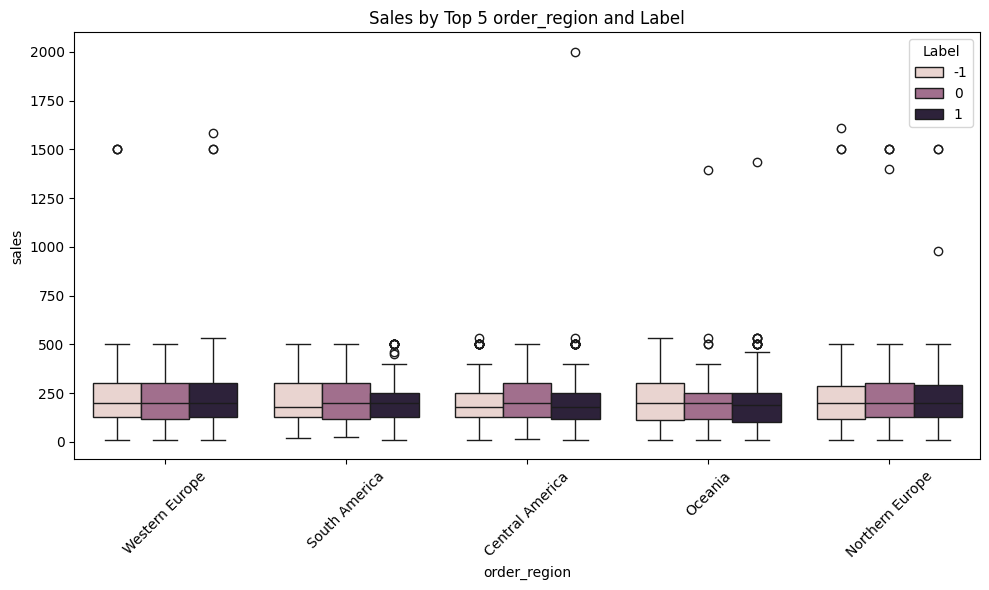

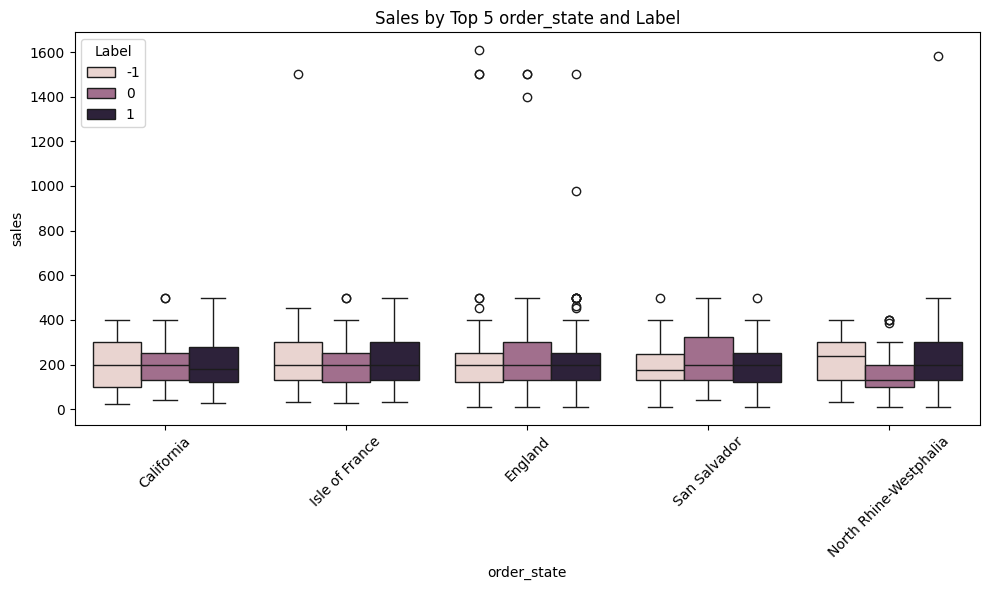

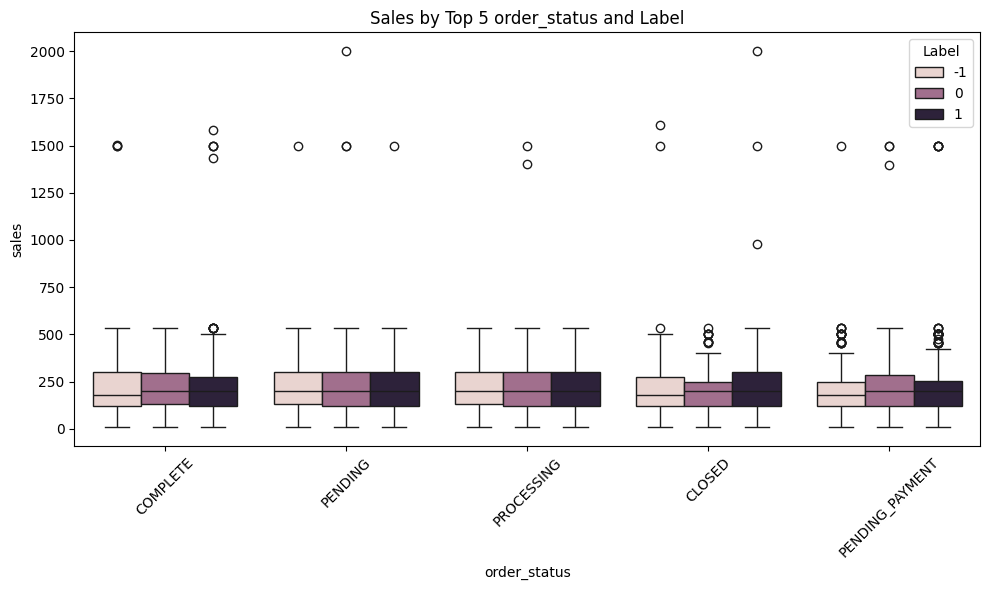

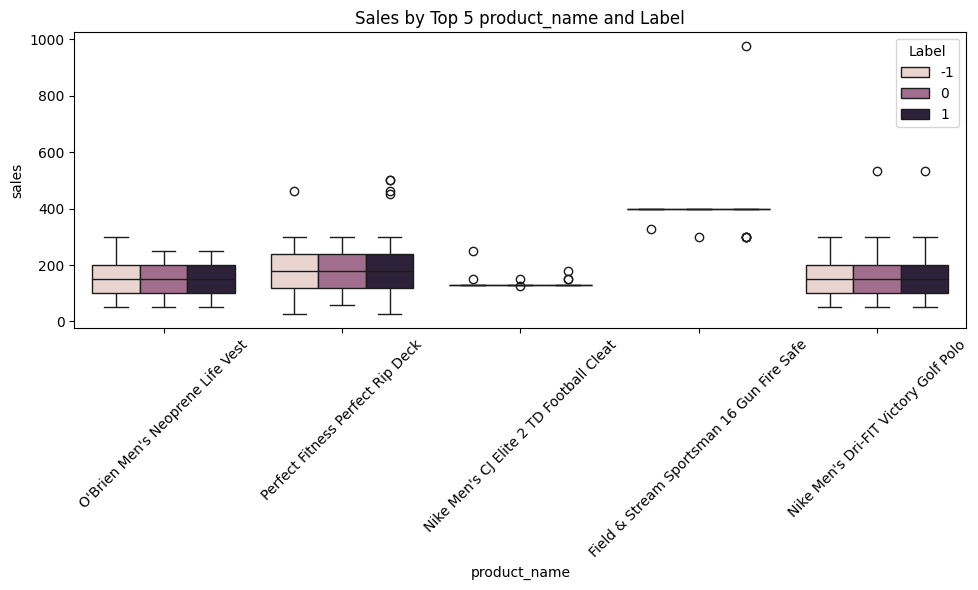

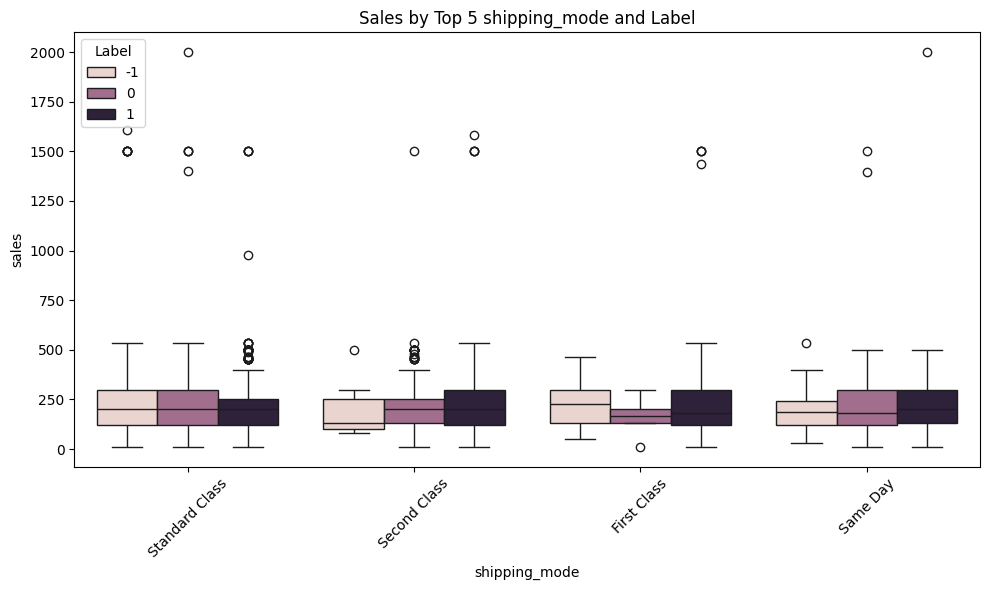

In [31]:
#Visualization of Label by Sales and Other Cathegorical Variables
for col in df_cat.columns:
    top_values = df_cat[col].value_counts().nlargest(5).index
    filtered_df = df_cat[df_cat[col].isin(top_values)]
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=filtered_df, x=col, y=df['sales'], hue=df['label'])
    plt.title(f'Sales by Top 5 {col} and Label')
    plt.xticks(rotation=45)
    plt.legend(title='Label')
    plt.tight_layout()
    plt.show()

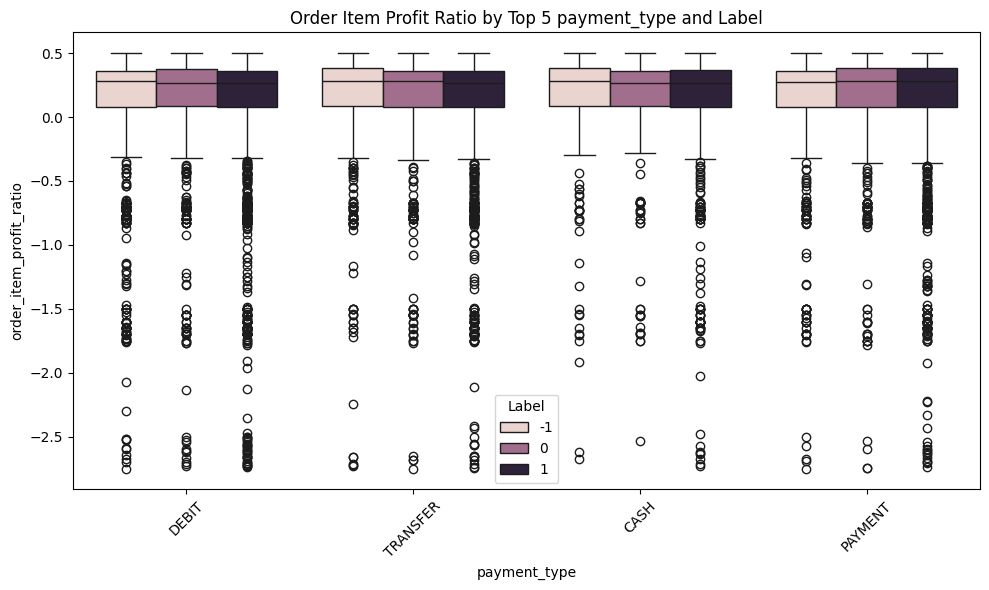

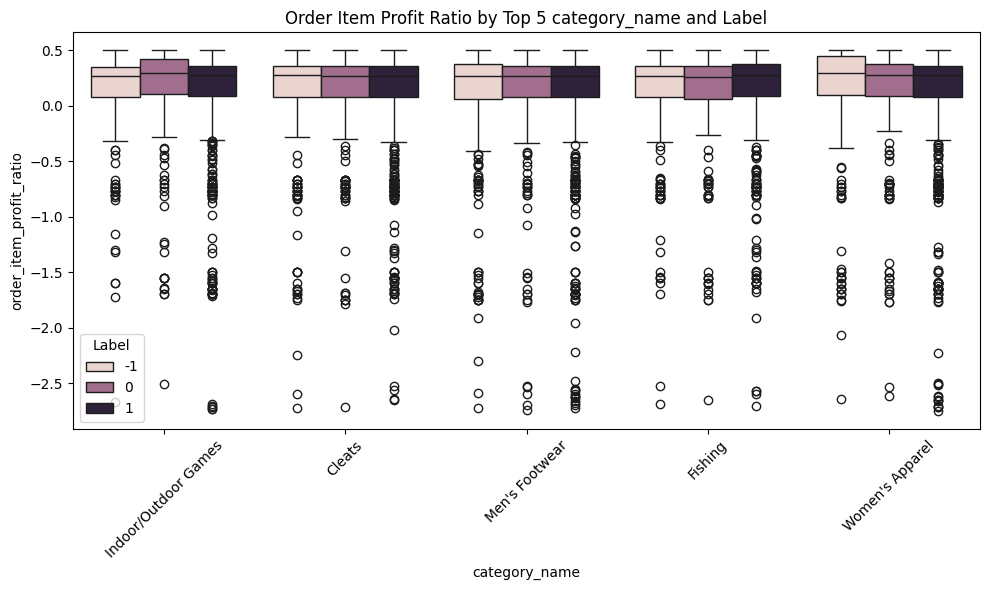

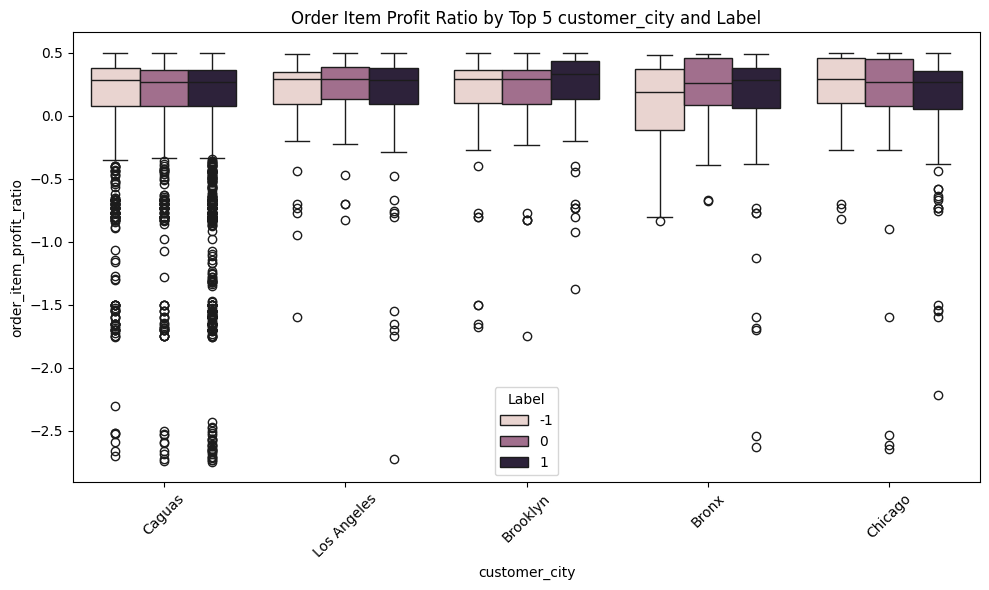

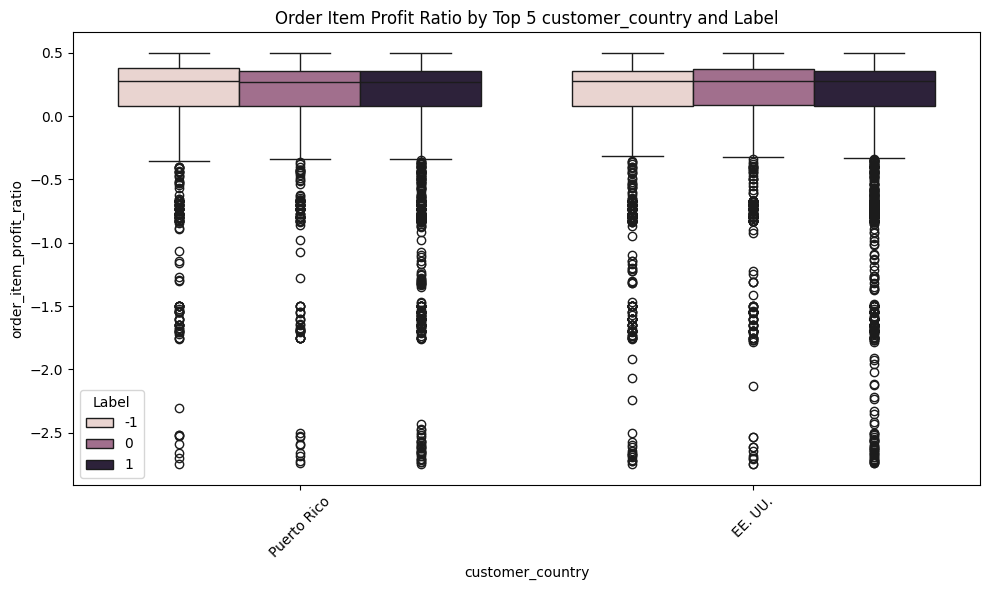

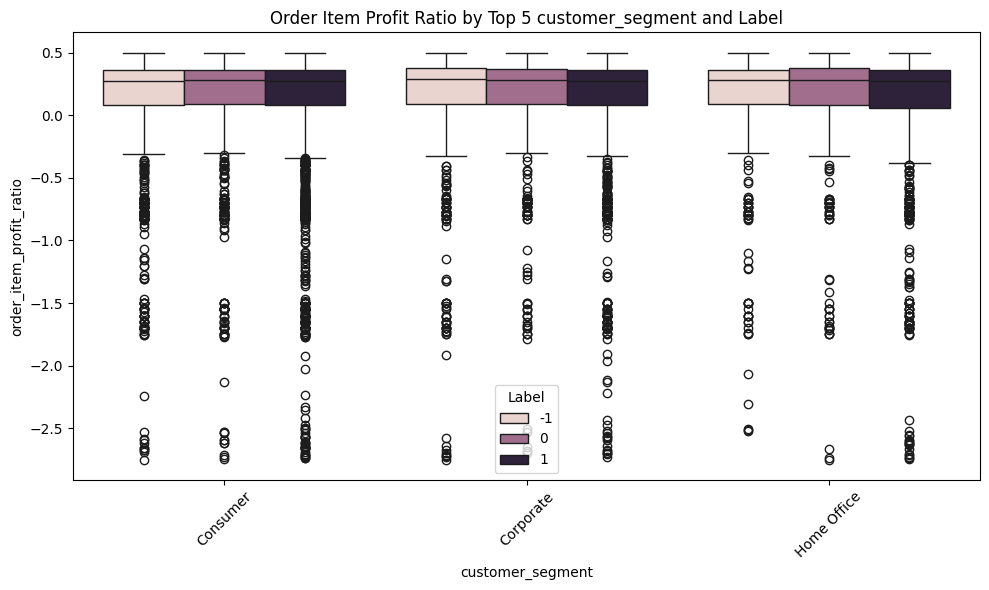

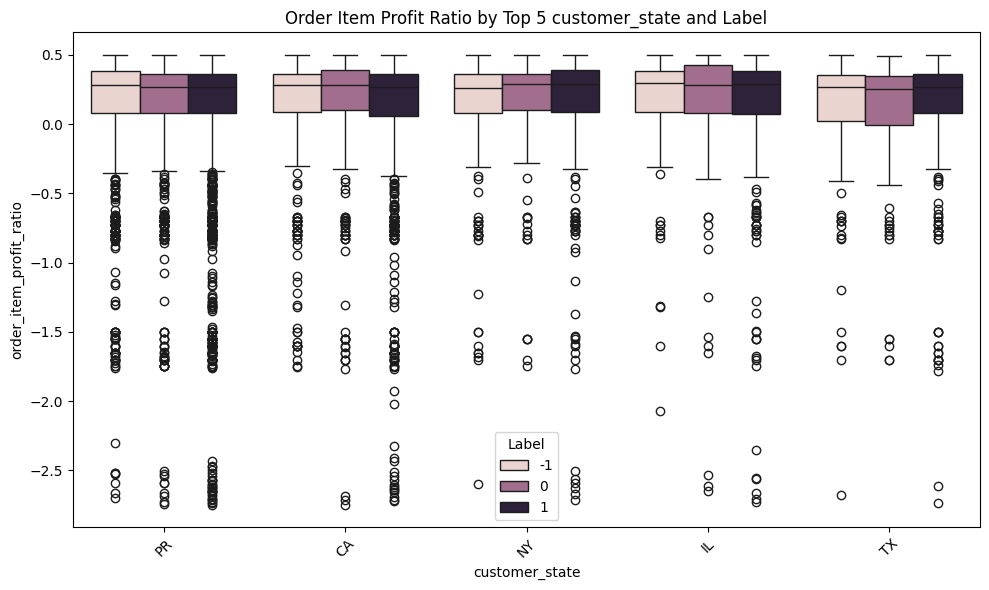

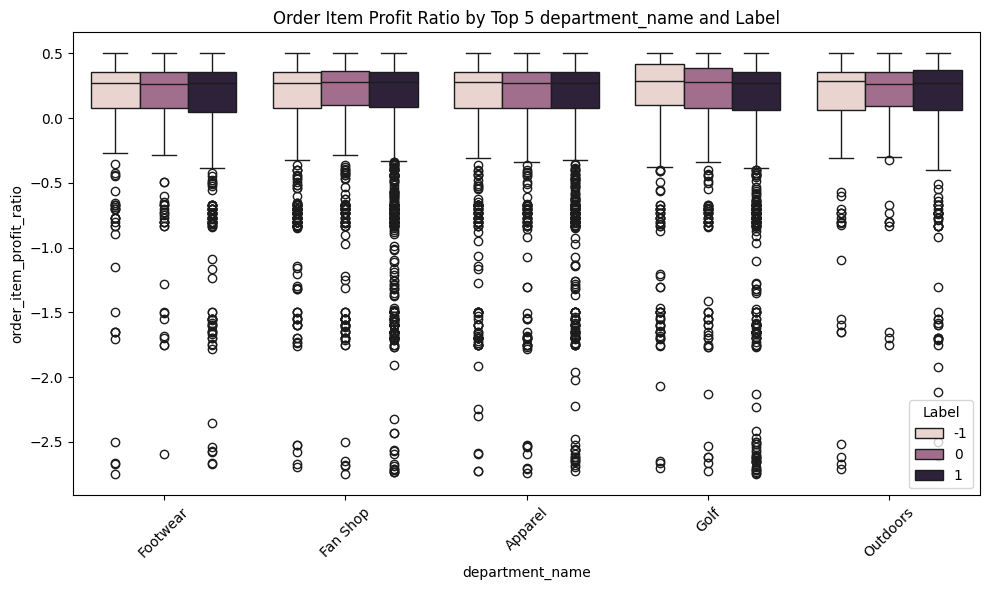

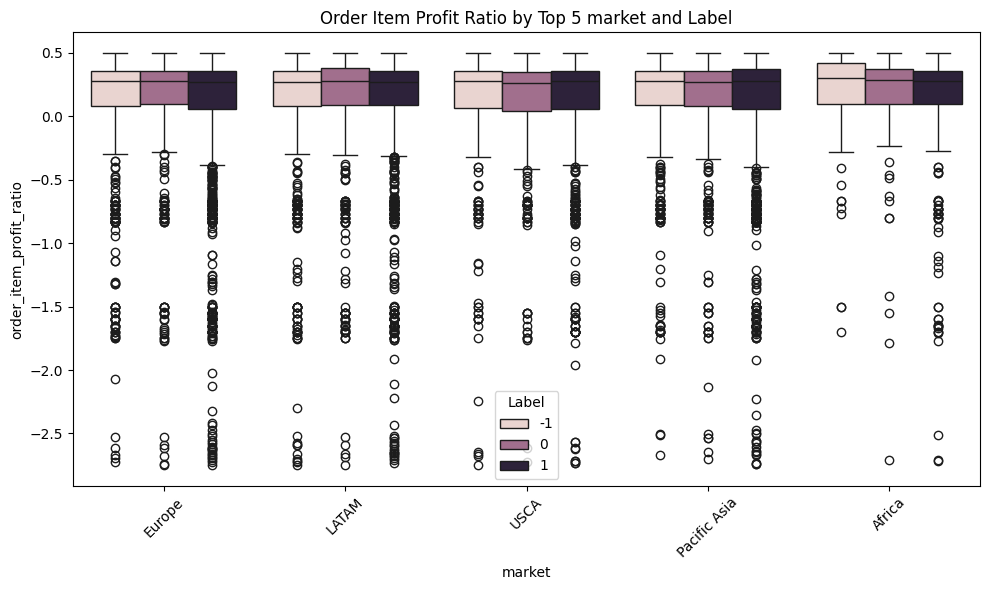

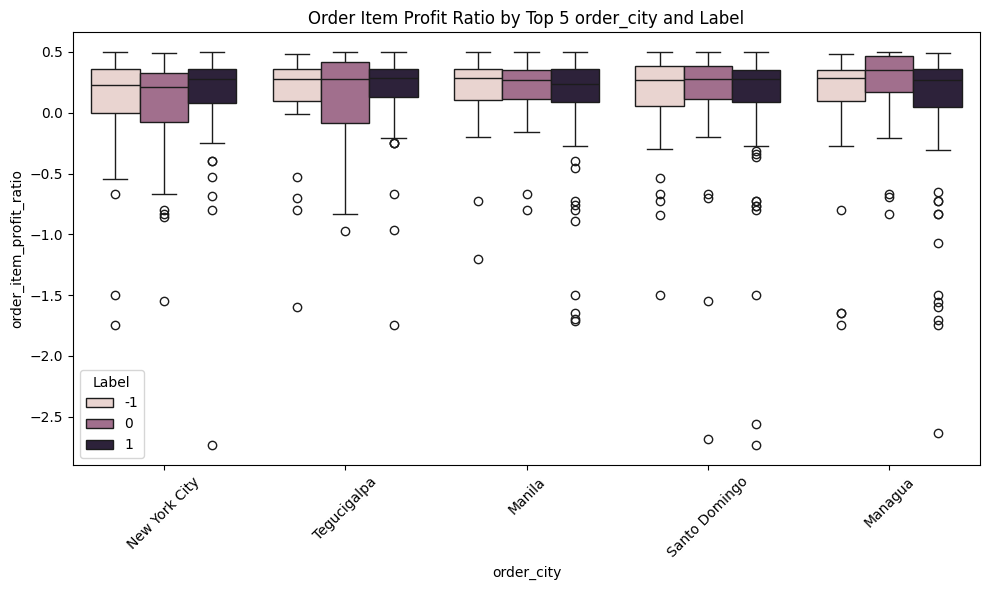

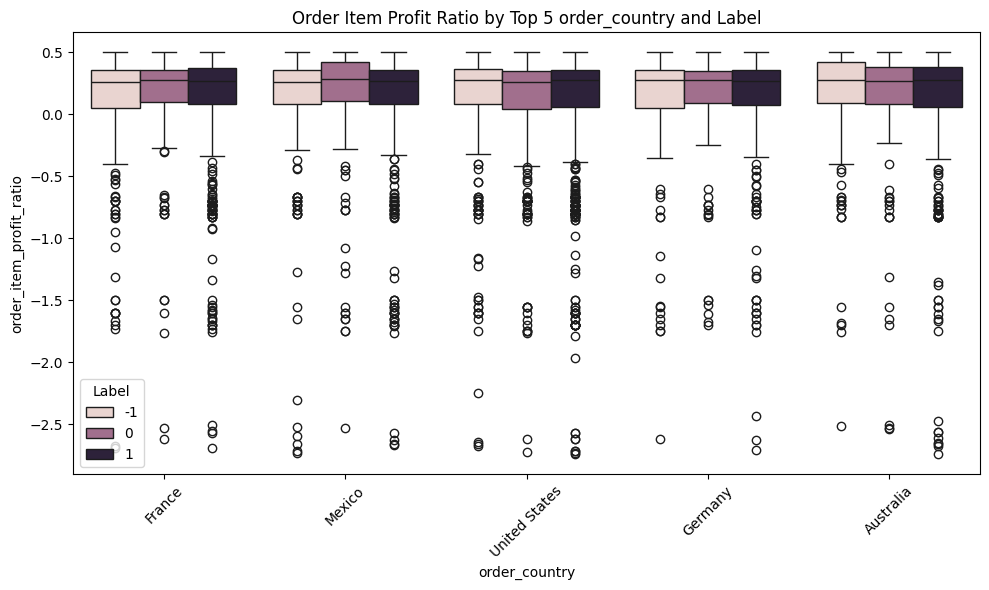

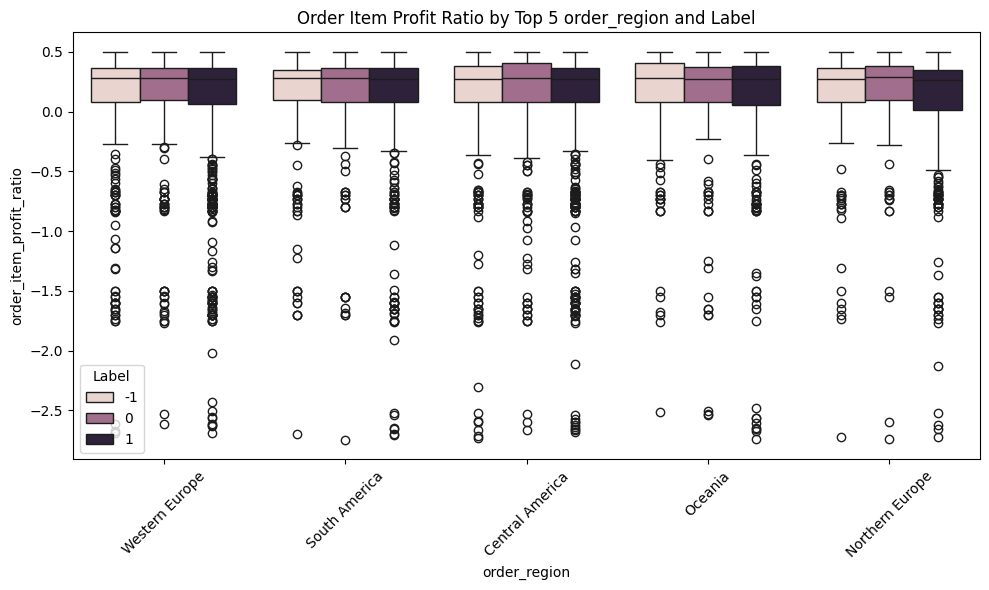

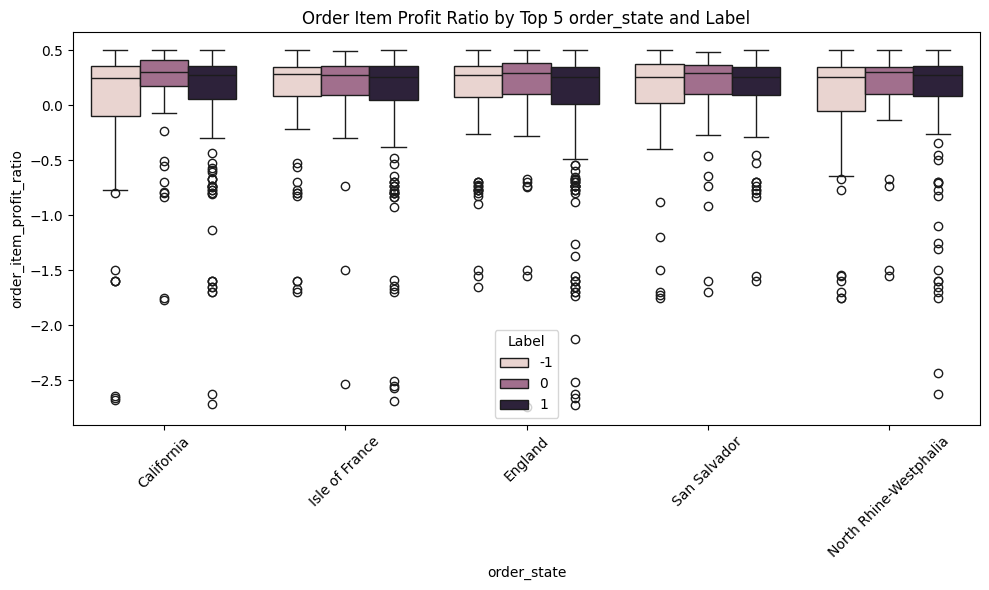

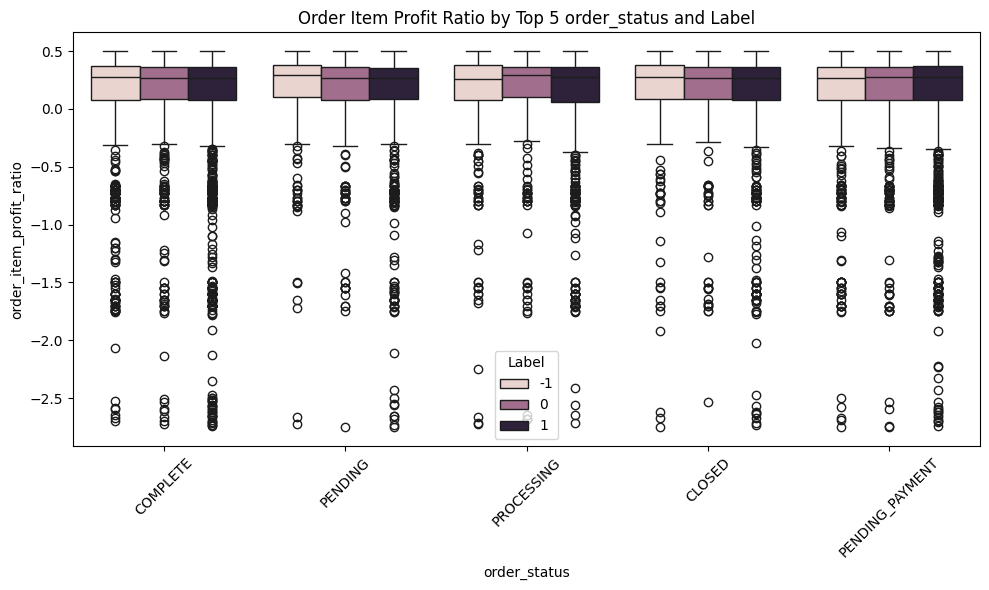

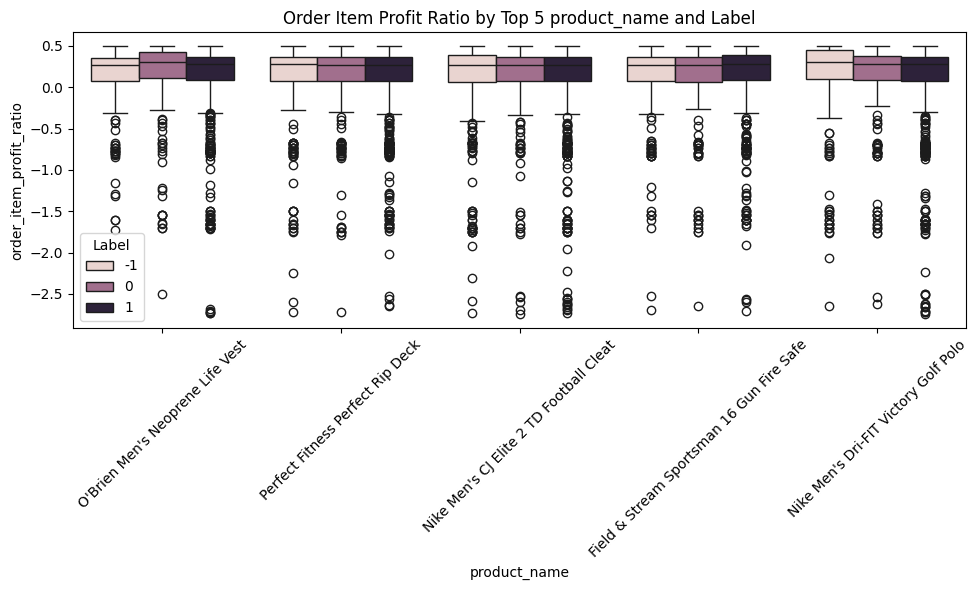

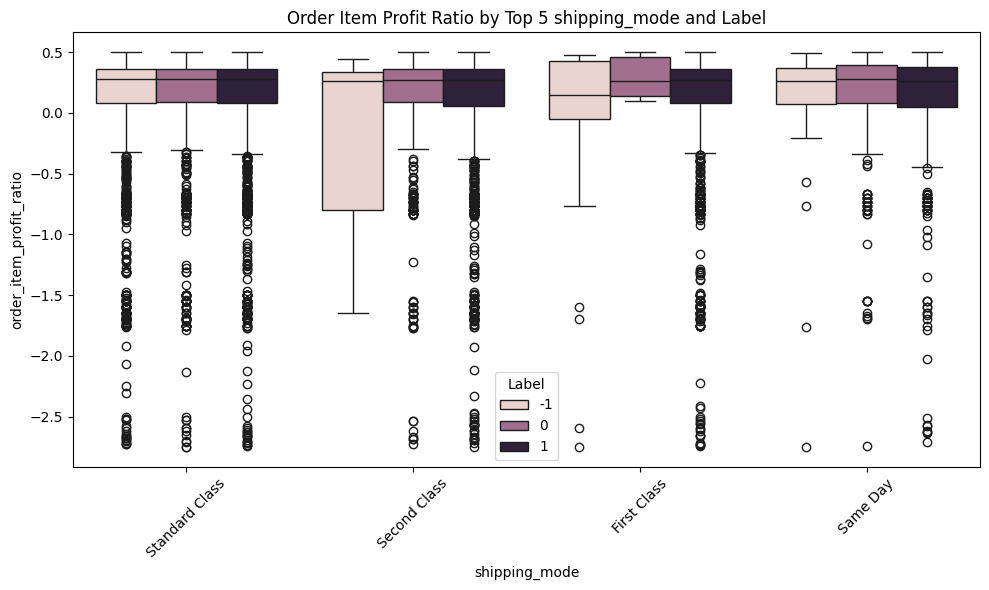

In [34]:
#Visualization of Label by Profit Per Order and Other Cathegorical Variables
for col in df_cat.columns:
    top_values = df_cat[col].value_counts().nlargest(5).index
    filtered_df = df_cat[df_cat[col].isin(top_values)]
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=filtered_df, x=col, y=df['order_item_profit_ratio'], hue=df['label'])
    plt.title(f'Order Item Profit Ratio by Top 5 {col} and Label')
    plt.xticks(rotation=45)
    plt.legend(title='Label')
    plt.tight_layout()
    plt.show()

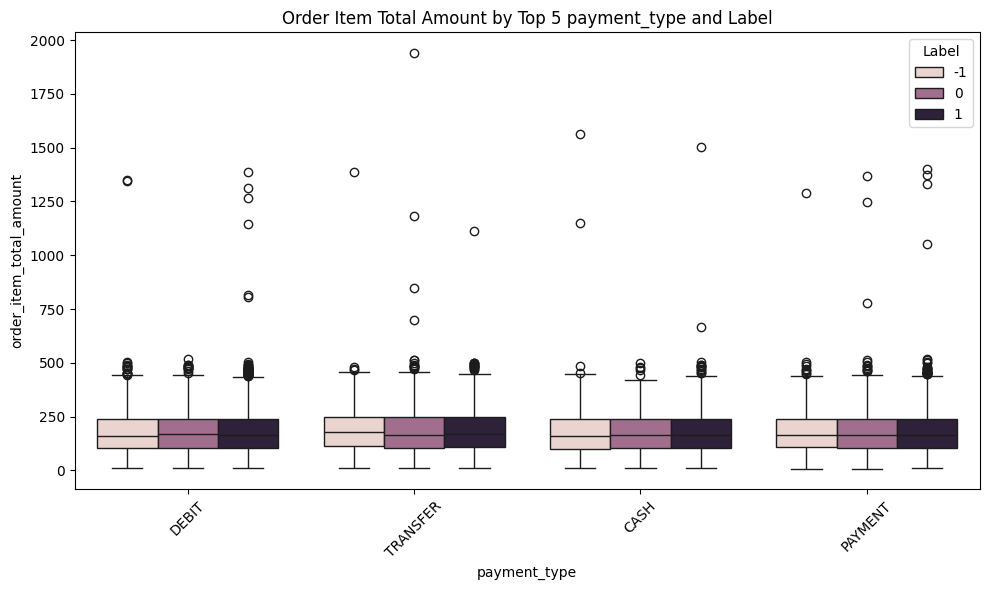

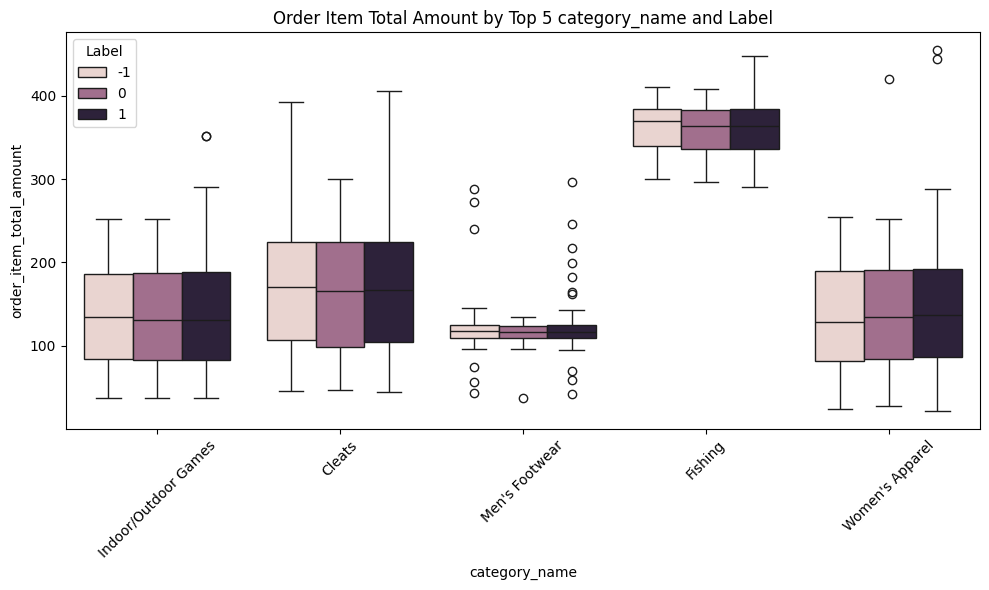

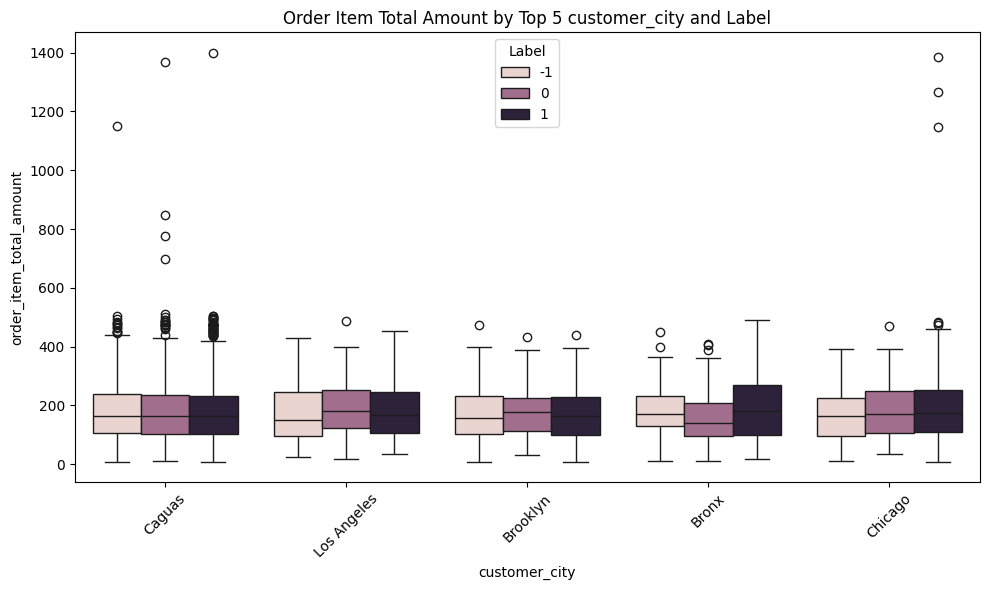

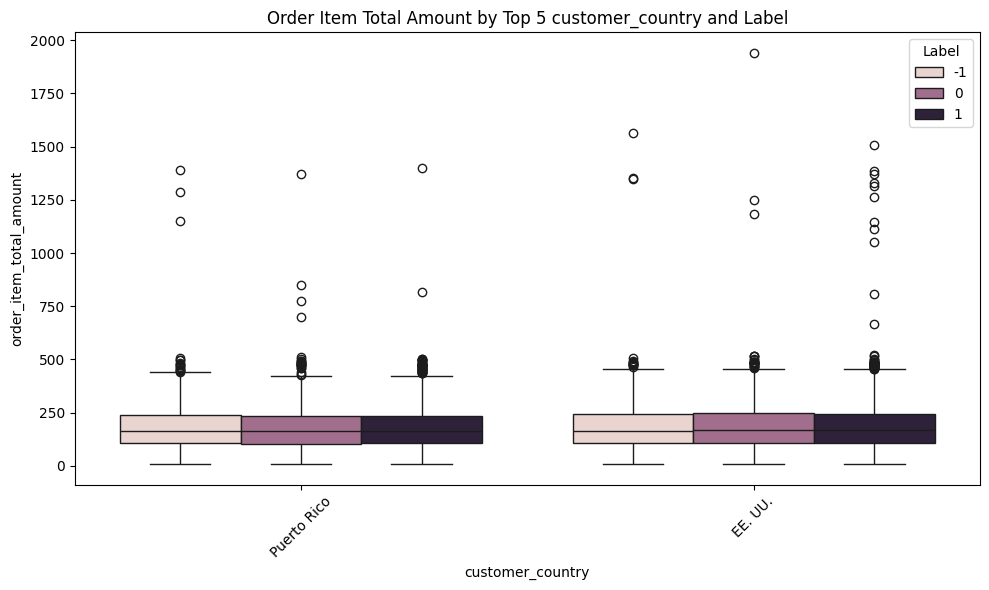

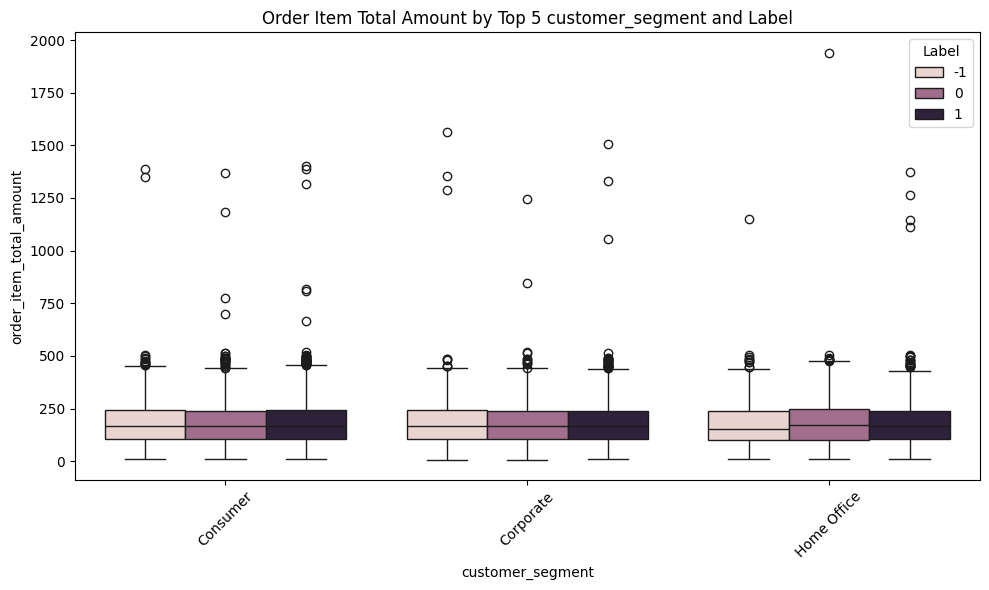

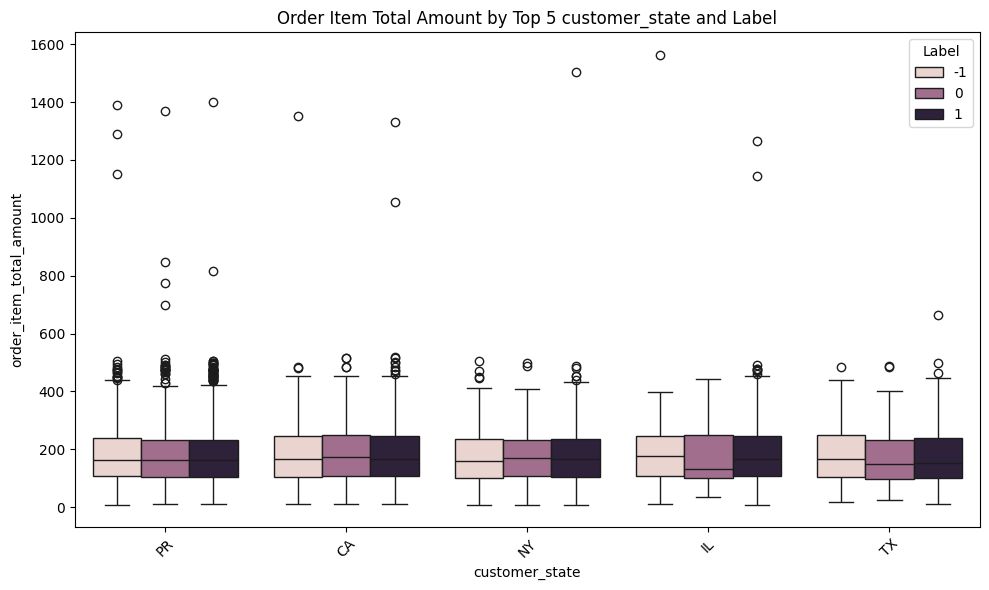

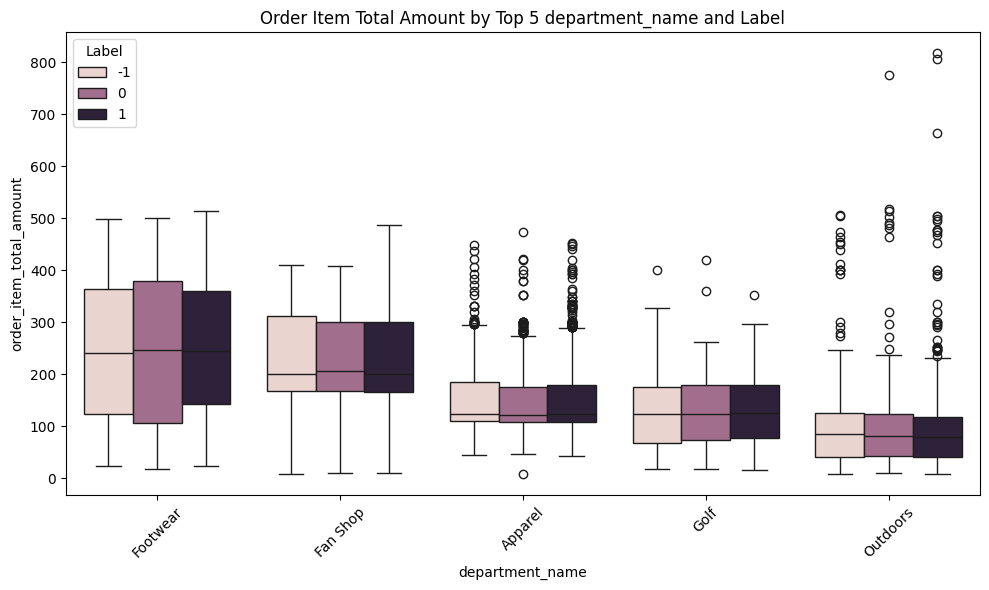

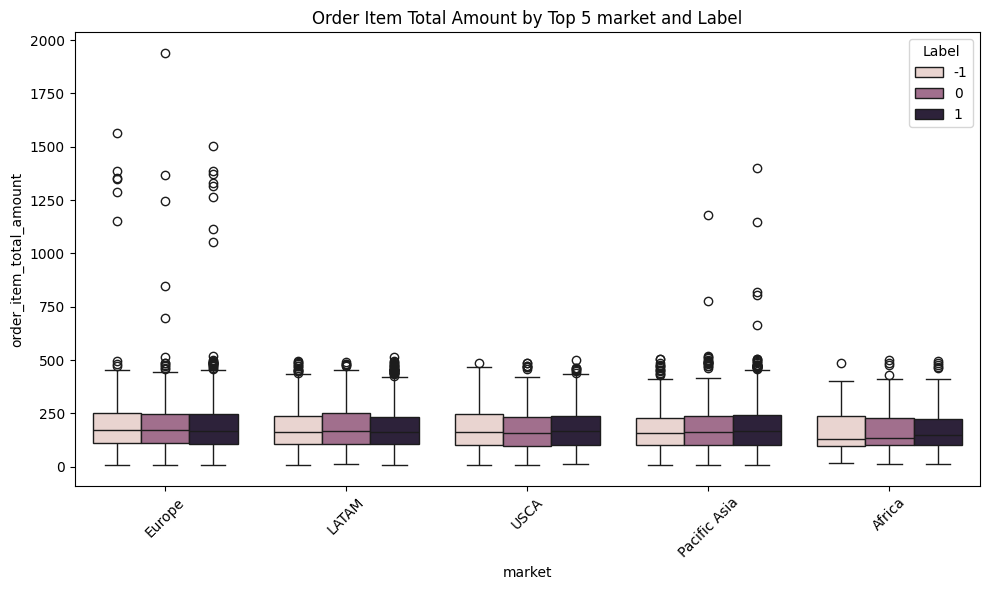

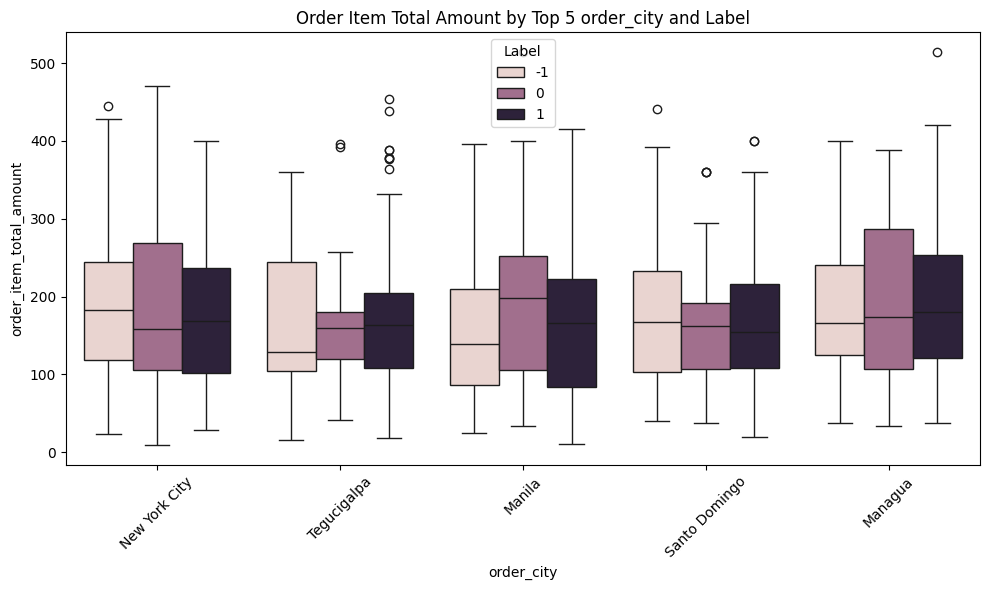

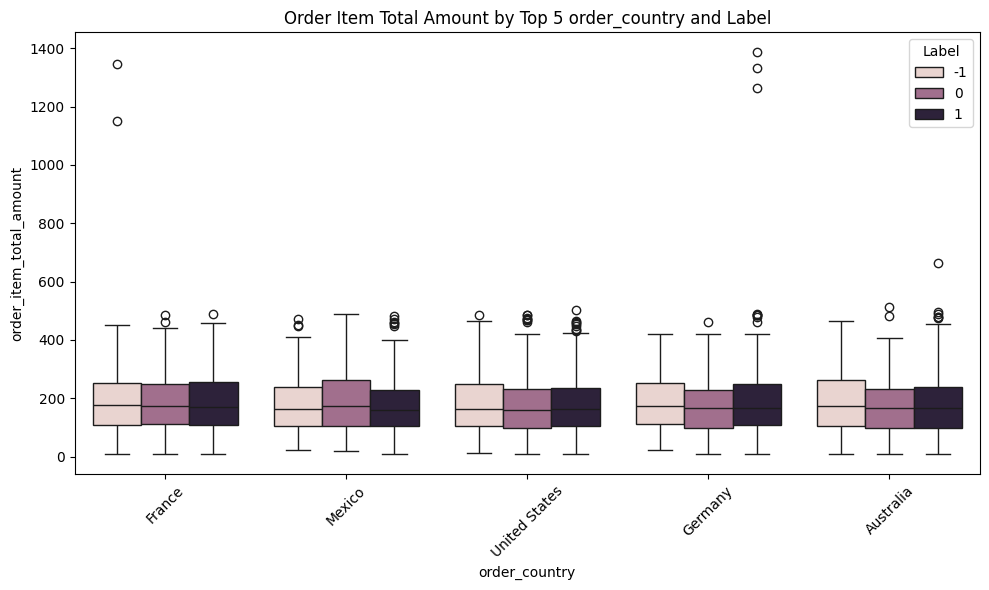

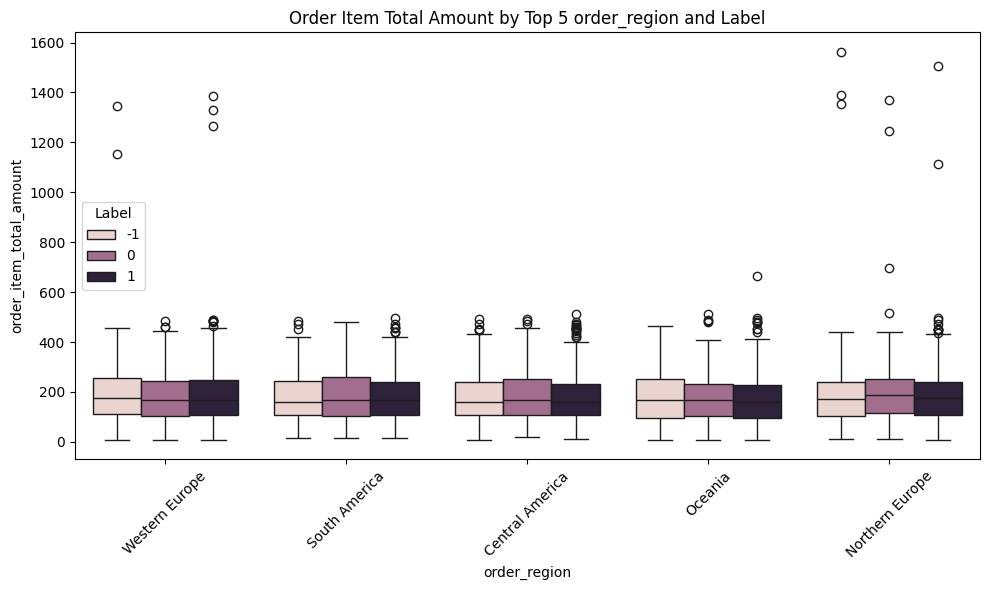

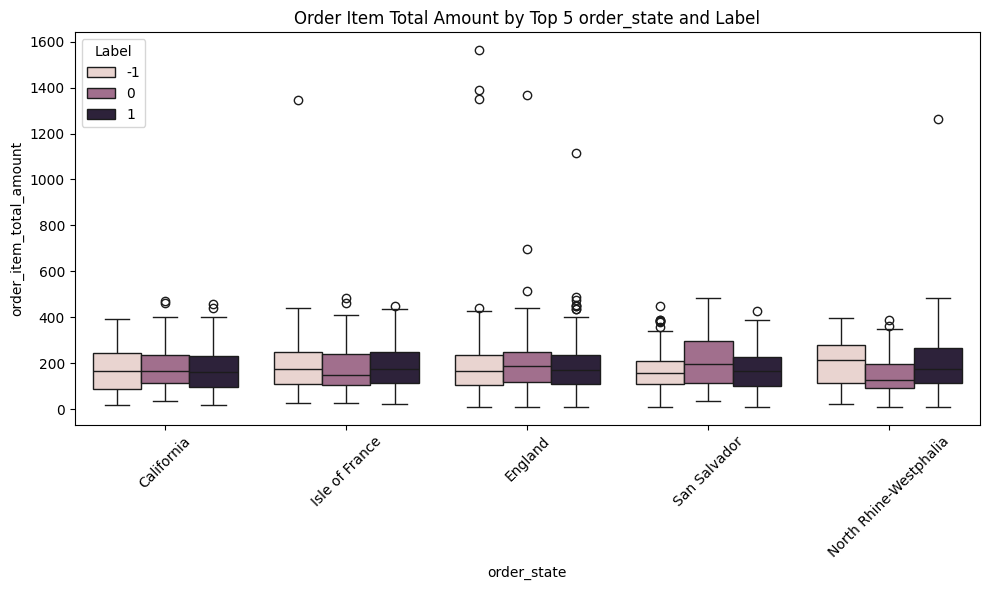

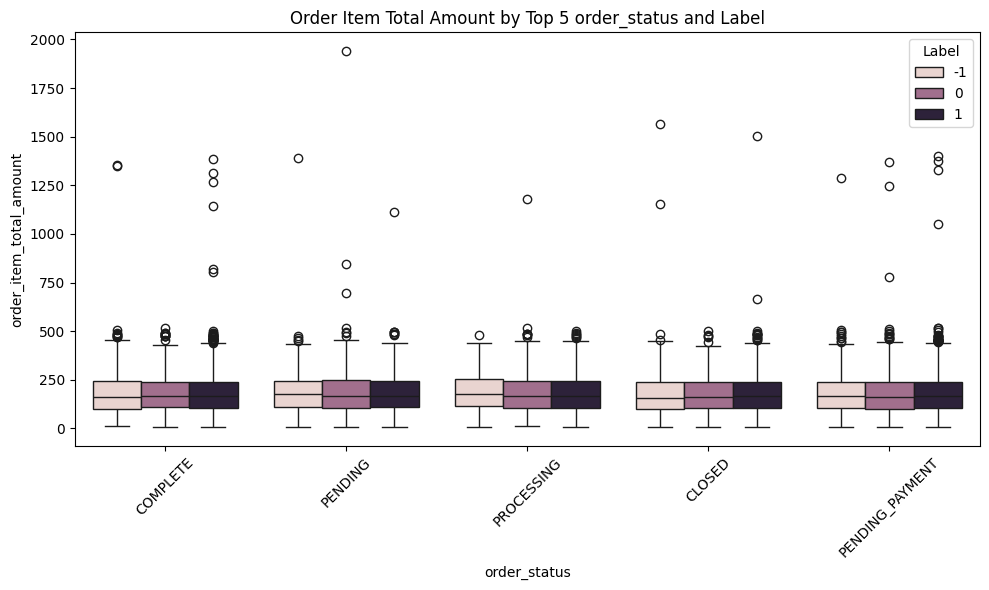

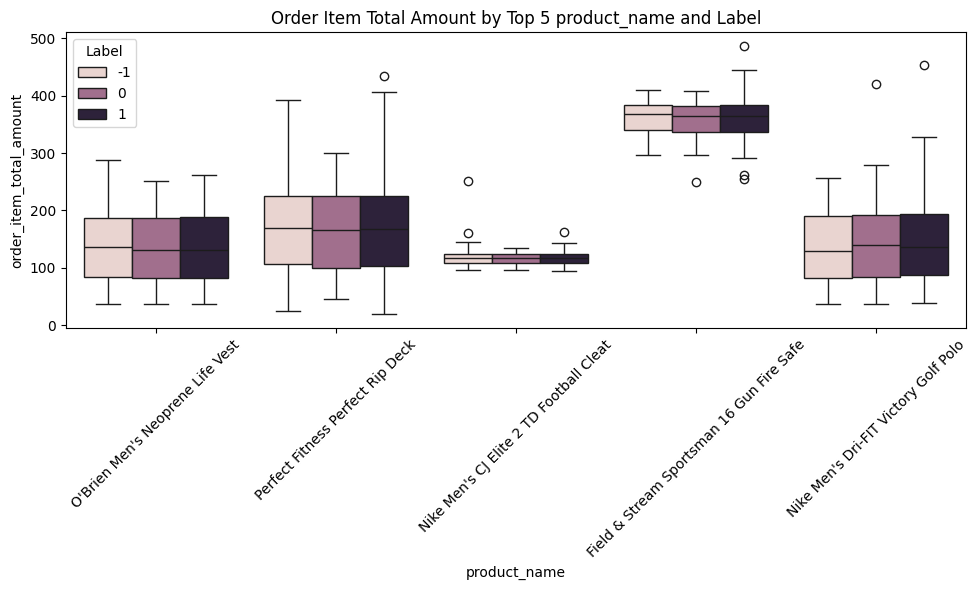

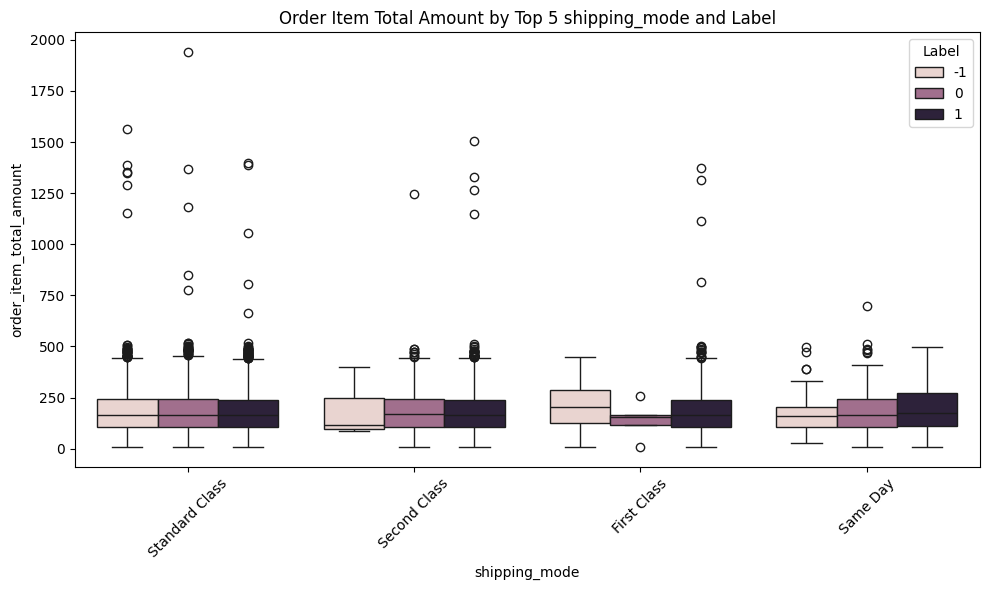

In [59]:
#Visualization of Label byOrder Item Total Amount and Other Cathegorical Variables
for col in df_cat.columns:
    top_values = df_cat[col].value_counts().nlargest(5).index
    filtered_df = df_cat[df_cat[col].isin(top_values)]
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=filtered_df, x=col, y=df['order_item_total_amount'], hue=df['label'])
    plt.title(f'Order Item Total Amount by Top 5 {col} and Label')
    plt.xticks(rotation=45)
    plt.legend(title='Label')
    plt.tight_layout()
    plt.show()

In [32]:
#Cheching the descriptive statistics of the original_data to understand the features with outliers
df.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

profit_per_order  sales_per_customer      latitude     longitude  \
count      15549.000000        15549.000000  15549.000000  15549.000000   
mean          22.604542          179.888256     29.677619    -84.512318   
std           99.265198          113.727323      9.877876     20.681015   
min        -3442.500000            8.351162    -33.937553   -158.025990   
10%          -43.356235           49.860326     18.227572   -118.213226   
25%            7.562795          104.397330     18.263327    -98.088170   
50%           31.693370          165.944170     33.435677    -76.580800   
75%           63.872166          242.440930     39.277313    -66.370575   
90%          101.861147          339.975784     41.377546    -66.370520   
max          911.800000         1939.990000     48.781933    115.263080   

       order_item_discount  order_item_discount_rate  \
count         15549.000000              15549.000000   
mean             20.782118                  0.102717   
std              22.953833                  0.070101   
min               0.000000                  0.000000   
10%               2.000000                  0.010000   
25%               6.000000                  0.040000   
50%              14.588252                  0.100000   
75%              30.000000                  0.160000   
90%              48.000000                  0.200000   
max             500.000000                  0.250000   

       order_item_product_price  order_item_profit_ratio  order_item_quantity  \
count              15549.000000             15549.000000         15549.000000   
mean                 137.005272                 0.120391             2.165202   
std                  134.545269                 0.474088             1.468627   
min                    9.990000                -2.750000             1.000000   
10%                   39.990000                -0.273958             1.000000   
25%                   50.000000                 0.080000             1.000000   
50%                   59.990000                 0.270000             1.000000   
75%                  199.990000                 0.360000             3.000000   
90%                  399.980000                 0.480000             5.000000   
max                 1999.990000                 0.500000             5.000000   

              sales  order_item_total_amount  order_profit_per_order  \
count  15549.000000             15549.000000            15549.000000   
mean     200.562289               179.780850               22.273342   
std      125.984986               110.999735              117.503163   
min        9.990000                 7.490000            -3442.500000   
10%       59.990000                49.804381              -44.822184   
25%      119.980000               105.570910                7.443977   
50%      199.920000               165.990000               32.440100   
75%      299.950000               242.436400               64.303566   
90%      399.980000               339.980000              102.863902   
max     1999.990000              1939.990000              911.800000   

       product_price         label  
count   15549.000000  15549.000000  
mean      136.629368      0.349283  
std       133.366285      0.826623  
min         9.990000     -1.000000  
10%        39.990000     -1.000000  
25%        50.000000      0.000000  
50%        59.990000      1.000000  
75%       199.990000      1.000000  
90%       399.980000      1.000000  
max      1999.990000      1.000000

##### Features with outliers:
* profit_per_order
* sales_per_customer
* order_item_discount
* ordr_item_product_price
* order_item_profit_ratio
* sales
* order_item_total_amount
* order_profit_per_order
* product_price

### Identification of Missing Values and Strategies for Handling Them

In [33]:
original_df.isnull().sum().sum()

np.int64(0)

## 3. DATA PROCESSING
* Encode categorical variables such as customer_segment and shipping_mode.
* Handle missing values and outliers in critical columns.
* Standardize or normalize numerical features, including profit_per_order and sales_per_customer.

### Encoding Categorical Variables

In [34]:
cat_for_encoding = df[['customer_segment', 'shipping_mode']].copy()

In [35]:
other_df_num.head()

profit_per_order  sales_per_customer  order_item_discount  \
0         34.448338            92.49099            12.623338   
1         91.193540           181.99008            16.500000   
2          8.313806            89.96643             6.600000   
3        -89.463196            99.15065            16.942171   
4         44.722590           170.97824            29.990000   

   order_item_discount_rate  order_item_product_price  \
0                      0.13                     99.99   
1                      0.07                    199.99   
2                      0.06                     49.98   
3                      0.16                     59.99   
4                      0.15                    199.99   

   order_item_profit_ratio  order_item_quantity   sales  \
0                     0.41                  1.0   99.99   
1                     0.48                  1.0  199.99   
2                     0.09                  2.0   99.96   
3                    -0.80                  2.0  119.98   
4                     0.27                  1.0  199.99   

   order_item_total_amount  order_profit_per_order  product_price  
0                 84.99157               32.083145          99.99  
1                181.99000               91.235870         199.99  
2                 93.81015                6.965549          49.98  
3                 99.89060              -95.401400          59.99  
4                171.07587               44.569000         199.99

In [36]:
#Encoding for logistic regression with OneHotEncoder
one_hot_encoded = pd.get_dummies(cat_for_encoding, drop_first=True)

In [37]:
#Encoding for Random Forest and XGBoost Using LabelEncoder
label_encoders = {}

for col in cat_for_encoding:
    le = LabelEncoder()
    cat_for_encoding[col] = le.fit_transform(cat_for_encoding[col]).astype(str)
    label_encoders[col] = le #storing encoder for inverse transform if needed

label_encoded = cat_for_encoding

In [38]:
label_encoded.head()

customer_segment shipping_mode
0                0             3
1                0             3
2                0             2
3                0             2
4                0             3

### Handling Missing Values and Outliers in Critical Columns

In [39]:
cols_with_outliers = ['profit_per_order', 'sales_per_customer', 'order_item_discount', 'order_item_product_price', 'order_item_profit_ratio', 
                      'sales', 'order_item_total_amount', 'order_profit_per_order', 'product_price']

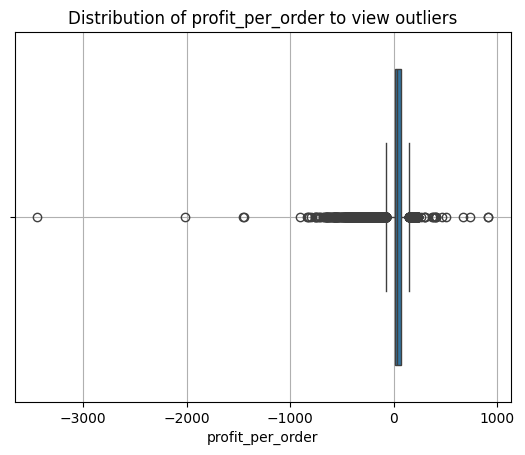

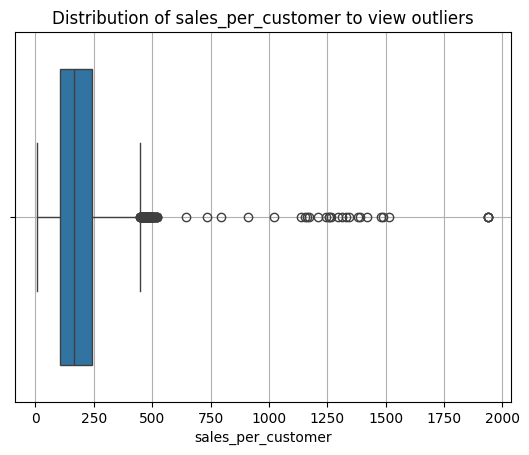

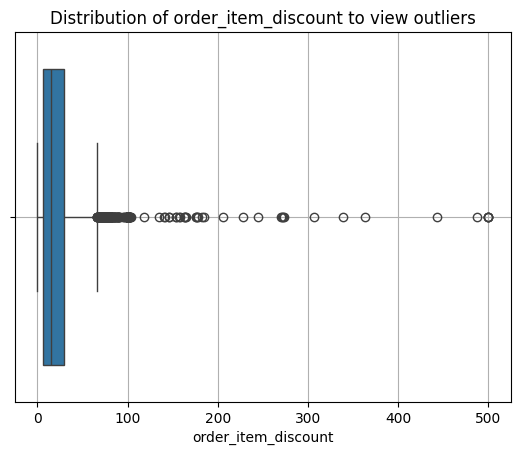

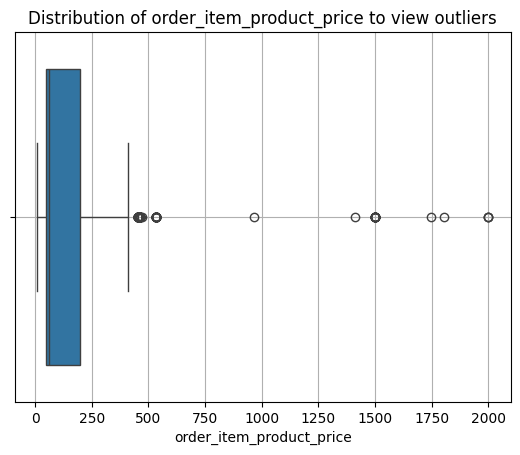

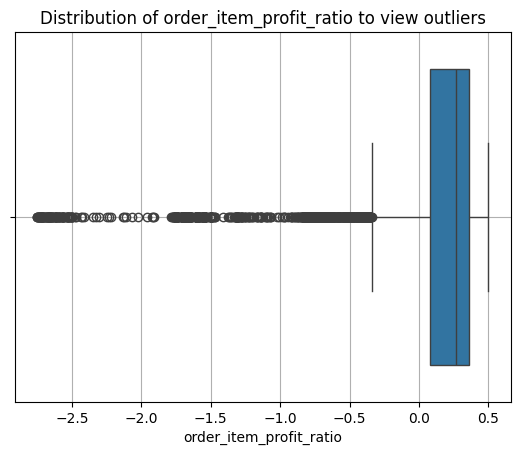

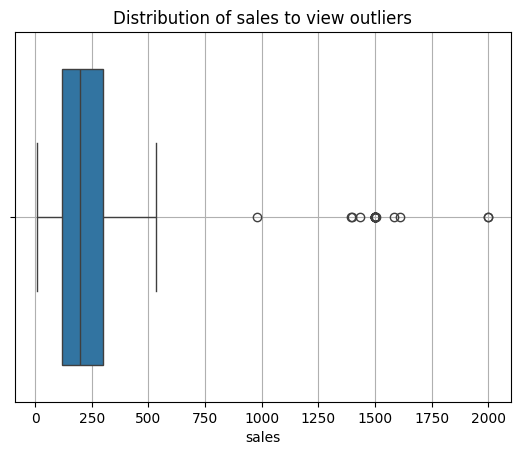

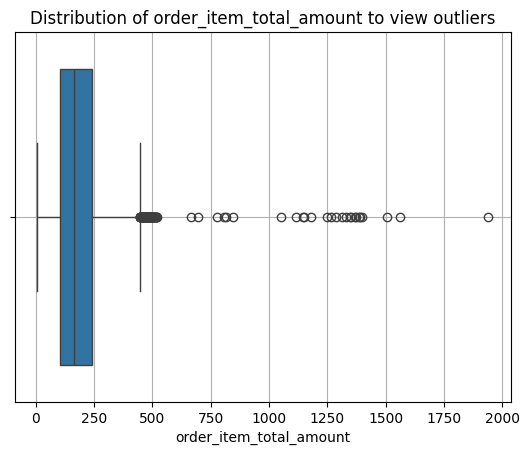

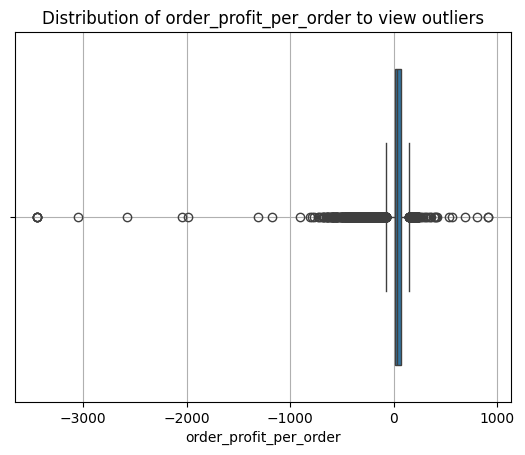

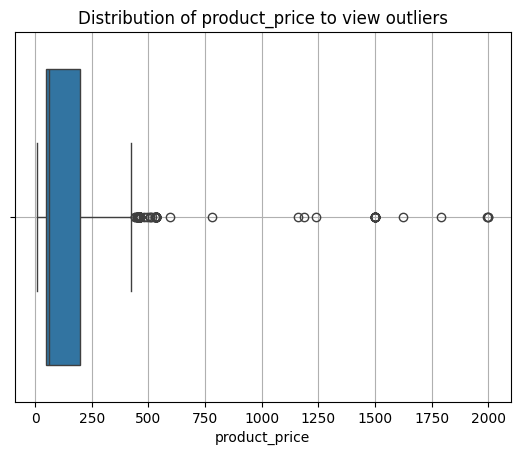

In [40]:
#Visualizing the distribution of the features with outliers
for col in cols_with_outliers:
    sns.boxplot(x=col, data=df_num)
    plt.title(f'Distribution of {col} to view outliers')
    plt.grid()
    plt.show()

In [41]:
#Handling the outliers by clipping
for col in cols_with_outliers:
    Q1 = df_num[col].quantile(0.05)
    Q3 = df_num[col].quantile(0.95)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_num[col] = df_num[col].clip(lower, upper)

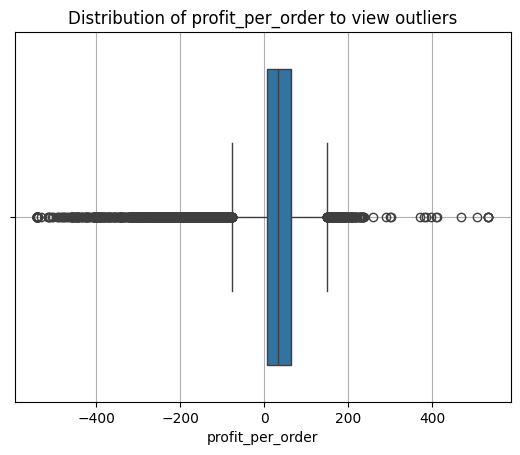

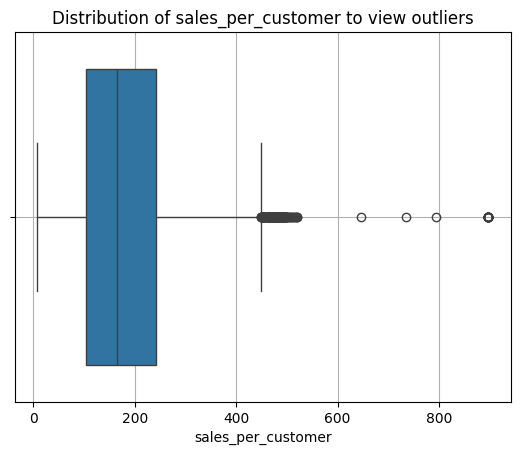

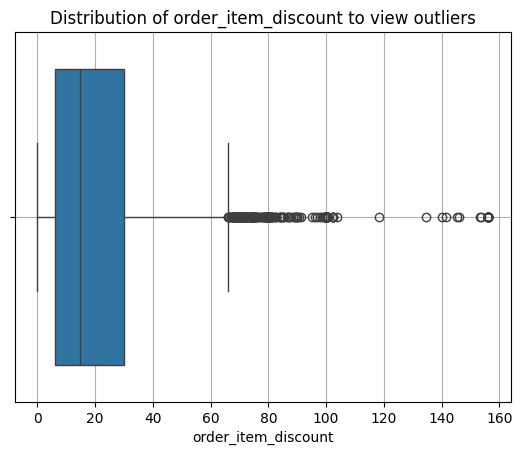

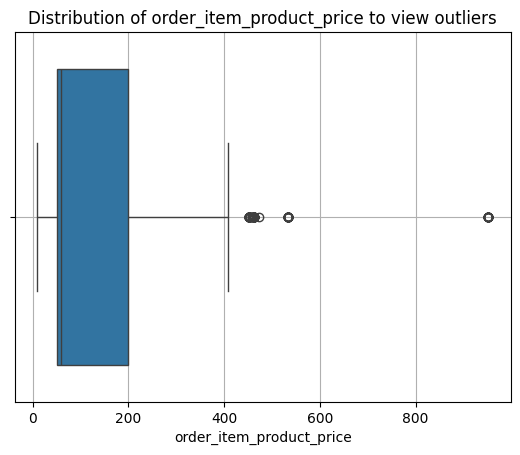

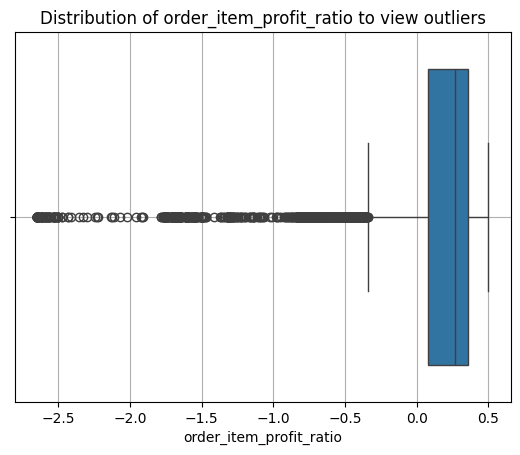

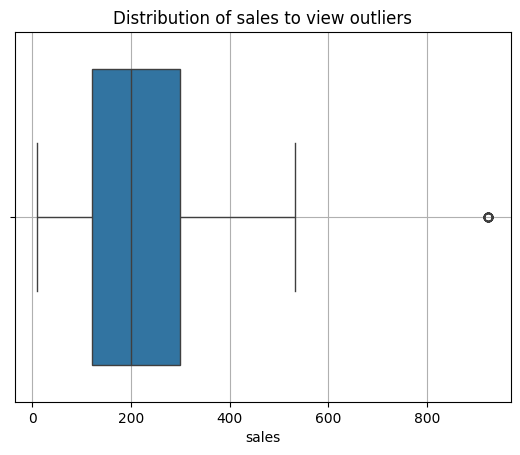

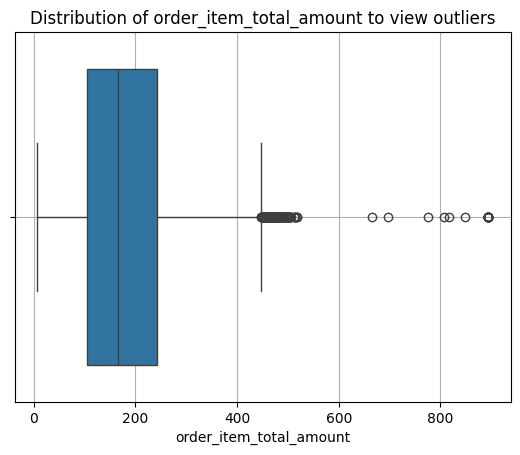

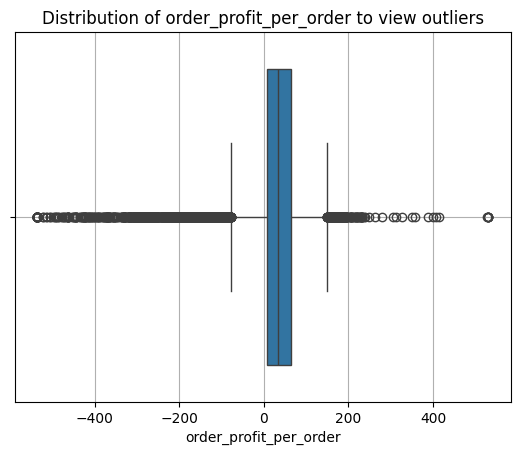

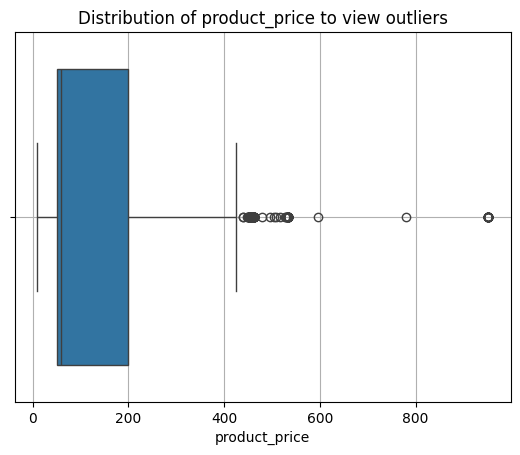

In [42]:
#Visualizing the distribution of the features after clipping
for col in cols_with_outliers:
    sns.boxplot(x=col, data=df_num)
    plt.title(f'Distribution of {col} to view outliers')
    plt.grid()
    plt.show()

### Standardization/Normalization of Numerical Features

In [43]:
lgr_num_df = df_num.copy()

In [44]:
numeric_cols = df_num.columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'label']

In [45]:
#Standardization with StandardScaler
scaler = StandardScaler()
lgr_num_df[numeric_cols] = scaler.fit_transform(lgr_num_df[numeric_cols])

In [46]:
lgr_num_df.head()

profit_per_order  sales_per_customer  order_item_discount  \
0          0.124342           -0.814303            -0.390226   
1          0.755165            0.027074            -0.199738   
2         -0.166189           -0.838036            -0.686195   
3         -1.253153           -0.751696            -0.178011   
4          0.238559           -0.076448             0.463121   

   order_item_discount_rate  order_item_product_price  \
0                  0.389207                 -0.288367   
1                 -0.466730                  0.515647   
2                 -0.609387                 -0.690455   
3                  0.817176                 -0.609973   
4                  0.674520                  0.515647   

   order_item_profit_ratio  order_item_quantity     sales  \
0                 0.611835            -0.793421 -0.853611   
1                 0.759805            -0.793421  0.004513   
2                -0.064601            -0.112491 -0.853869   
3                -1.945937            -0.112491 -0.682072   
4                 0.315894            -0.793421  0.004513   

   order_item_total_amount  order_profit_per_order  product_price  label  
0                -0.889824                0.091110      -0.286901     -1  
1                 0.026230                0.754637       0.519265     -1  
2                -0.806541               -0.190639      -0.690064      1  
3                -0.749117               -1.338909      -0.609367      0  
4                -0.076843                0.231166       0.519265      1

In [47]:
df_num.head()

profit_per_order  sales_per_customer  order_item_discount  \
0         34.448338            92.49099            12.623338   
1         91.193540           181.99008            16.500000   
2          8.313806            89.96643             6.600000   
3        -89.463196            99.15065            16.942171   
4         44.722590           170.97824            29.990000   

   order_item_discount_rate  order_item_product_price  \
0                      0.13                     99.99   
1                      0.07                    199.99   
2                      0.06                     49.98   
3                      0.16                     59.99   
4                      0.15                    199.99   

   order_item_profit_ratio  order_item_quantity   sales  \
0                     0.41                  1.0   99.99   
1                     0.48                  1.0  199.99   
2                     0.09                  2.0   99.96   
3                    -0.80                  2.0  119.98   
4                     0.27                  1.0  199.99   

   order_item_total_amount  order_profit_per_order  product_price  label  
0                 84.99157               32.083145          99.99     -1  
1                181.99000               91.235870         199.99     -1  
2                 93.81015                6.965549          49.98      1  
3                 99.89060              -95.401400          59.99      0  
4                171.07587               44.569000         199.99      1

## 4. FEATURE ENGINEERING
* Create new features such as shipping_duration (difference between order and shipping dates).
* Engineer features from product_category_id and customer_country.
* Perform feature selection to identify the most predictive variables.

### Creating New Features

In [48]:
#Creating a new feature of shipping duration
df['shipping_duration'] = (df['shipping_date'] - df['order_date']).dt.total_seconds()/3600

In [49]:
df_num['shipping_duration'], lgr_num_df['shipping_duration'] = df['shipping_duration'], df['shipping_duration']

### Engineering Features from Product Category ID and Customer Country

In [50]:
df['product_category_id'].nunique()

492

In [51]:
df['customer_country'].nunique()

2

In [52]:
#Engineering features from cproduct_category_id and customer_country
df['category_country_combo'] = df['product_category_id'].astype(str) + "_" + df['customer_country']

In [53]:
df['category_country_encoded'] = le.fit_transform(df['category_country_combo'])

In [54]:
df_num['category_country_encoded'] = df['category_country_encoded']
lgr_num_df['category_country_encoded'] = df['category_country_encoded']

In [55]:
lgr_df = pd.concat([lgr_num_df, one_hot_encoded], axis=1)

In [56]:
tree_models_df = pd.concat([df_num, label_encoded], axis=1)

In [57]:
print(tree_models_df.shape, lgr_df.shape)

(15549, 16) (15549, 19)


### Identifying the Most Predictive Variables with Feature Selection

##### i. Using SelectKBest with f_classif for the logistic regression dataset

In [58]:
%%time
selecter = SelectKBest(score_func=f_classif, k=20)
X_selected = selecter.fit_transform(lgr_df.drop(columns=['label'], axis=1), lgr_df['label'])
features_selected  = lgr_df.drop(columns=['label'], axis=1).columns[selecter.get_support()]
print("Top features: ", list(features_selected))

Top features:  ['profit_per_order', 'sales_per_customer', 'order_item_discount', 'order_item_discount_rate', 'order_item_product_price', 'order_item_profit_ratio', 'order_item_quantity', 'sales', 'order_item_total_amount', 'order_profit_per_order', 'product_price', 'shipping_duration', 'category_country_encoded', 'customer_segment_Corporate', 'customer_segment_Home Office', 'shipping_mode_Same Day', 'shipping_mode_Second Class', 'shipping_mode_Standard Class']
CPU times: total: 46.9 ms
Wall time: 149 ms


C:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:783: UserWarning: k=20 is greater than n_features=18. All the features will be returned.
  warnings.warn(


##### ii. Using Recursive Feature Elimination (RFE) for tree-based models dataset

In [59]:
%%time
model = RandomForestClassifier(random_state=42)
selector = RFE(model, n_features_to_select=20)
selector= selector.fit(tree_models_df.drop(columns=['label'], axis=1), tree_models_df['label'])

selected_features = tree_models_df.drop(columns=['label'], axis=1).columns[selector.support_]
print("Top features: ", list(selected_features))

C:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_rfe.py:300: UserWarning: Found n_features_to_select=20 > n_features=15. There will be no feature selection and all features will be kept.
  warnings.warn(


Top features:  ['profit_per_order', 'sales_per_customer', 'order_item_discount', 'order_item_discount_rate', 'order_item_product_price', 'order_item_profit_ratio', 'order_item_quantity', 'sales', 'order_item_total_amount', 'order_profit_per_order', 'product_price', 'shipping_duration', 'category_country_encoded', 'customer_segment', 'shipping_mode']
CPU times: total: 6.41 s
Wall time: 6.67 s


## 5. MODEL DVELOPMENT
* Split the dataset into training and testing sets.
* Train and evaluate multiple classification algorithms (e.g., Logistic Regression, Random Forest, XGBoost).
* Use hyperparameter tuning to optimize the best-performing model.

### Splitting the Dataset

['profit_per_order', 'order_item_discount_rate', 'order_item_product_price', 
            'order_item_profit_ratio', 'order_profit_per_order', 'product_price', 'customer_segment_Corporate', 
            'shipping_mode_Same Day', 'shipping_mode_Second Class', 'shipping_mode_Standard Class']

['profit_per_order', 'sales_per_customer', 'order_item_discount', 'order_item_discount_rate',
             'order_item_profit_ratio', 'order_item_total_amount', 'order_profit_per_order', 'shipping_duration', 
             'category_country_encoded', 'shipping_mode']

In [61]:
lgr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15549 entries, 0 to 15548
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   profit_per_order              15549 non-null  float64
 1   sales_per_customer            15549 non-null  float64
 2   order_item_discount           15549 non-null  float64
 3   order_item_discount_rate      15549 non-null  float64
 4   order_item_product_price      15549 non-null  float64
 5   order_item_profit_ratio       15549 non-null  float64
 6   order_item_quantity           15549 non-null  float64
 7   sales                         15549 non-null  float64
 8   order_item_total_amount       15549 non-null  float64
 9   order_profit_per_order        15549 non-null  float64
 10  product_price                 15549 non-null  float64
 11  label                         15549 non-null  int64  
 12  shipping_duration             15549 non-null  float64
 13  c

In [62]:
tree_models_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15549 entries, 0 to 15548
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   profit_per_order          15549 non-null  float64
 1   sales_per_customer        15549 non-null  float64
 2   order_item_discount       15549 non-null  float64
 3   order_item_discount_rate  15549 non-null  float64
 4   order_item_product_price  15549 non-null  float64
 5   order_item_profit_ratio   15549 non-null  float64
 6   order_item_quantity       15549 non-null  float64
 7   sales                     15549 non-null  float64
 8   order_item_total_amount   15549 non-null  float64
 9   order_profit_per_order    15549 non-null  float64
 10  product_price             15549 non-null  float64
 11  label                     15549 non-null  int64  
 12  shipping_duration         15549 non-null  float64
 13  category_country_encoded  15549 non-null  int64  
 14  custom

In [65]:
X1 = lgr_df[features_selected]
y1 = lgr_df['label']

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(12439, 18) (3110, 18)
(12439,) (3110,)


### Training and Evaluating Algorithms

#### Logistic Regression

In [66]:
Log_regressor = LogisticRegression(max_iter=1000, multi_class='multinomial')
Log_regressor.fit(X_train, y_train)
y_pred_LogR = Log_regressor.predict(X_test)

LogR_report = metrics.classification_report(y_test,y_pred_LogR)
LogR_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_LogR)
LogR_accuracy = metrics.accuracy_score(y_test, y_pred_LogR)
LogR_precision = metrics.precision_score(y_test, y_pred_LogR, average='weighted')
LogR_recall = metrics.recall_score(y_test, y_pred_LogR, average='weighted')
LogR_f1_score = metrics.f1_score(y_test, y_pred_LogR, average='weighted')
print("Logistic Regression Model Report: ") 
print(LogR_report)
print("Logistic Regression Model Confusion Matrix: ")
print(LogR_confusion_matrix)
print("Logistic Regression Model Accuracy Score: ", LogR_accuracy)
#print(metrics.classification_report(y_test, y_pred_LogR))

C:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Model Report: 
              precision    recall  f1-score   support

          -1       0.38      0.17      0.23       709
           0       0.00      0.00      0.00       611
           1       0.59      0.93      0.72      1790

    accuracy                           0.57      3110
   macro avg       0.32      0.36      0.32      3110
weighted avg       0.43      0.57      0.47      3110

Logistic Regression Model Confusion Matrix: 
[[ 117    1  591]
 [  62    0  549]
 [ 132    0 1658]]
Logistic Regression Model Accuracy Score:  0.5707395498392283


C:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


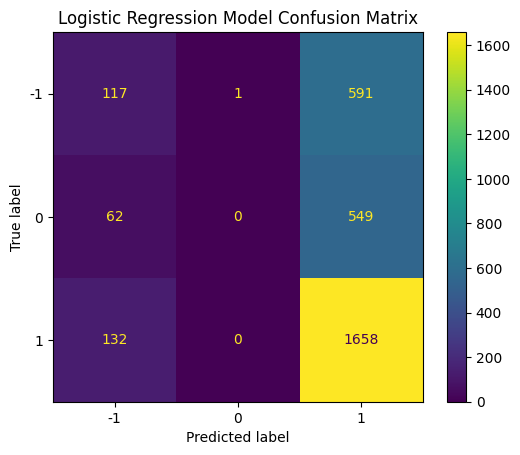

CPU times: total: 328 ms
Wall time: 441 ms


In [67]:
%%time
#Visualizing confusion matrix for Logistin regression model
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_LogR, cmap="viridis")
plt.title("Logistic Regression Model Confusion Matrix")
plt.show()

#### Tree-Based Models

In [68]:
X2 = tree_models_df[selected_features]
y2 = tree_models_df['label']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
print(X2_train.shape, X2_test.shape)
print(y2_train.shape, y2_test.shape)

(12439, 15) (3110, 15)
(12439,) (3110,)


##### i. Random Forest Classifier

In [69]:
%%time
RFC_model = RandomForestClassifier()
RFC_model.fit(X2_train, y2_train)

RFC_y_pred = RFC_model.predict(X2_test)
RFC_report = metrics.classification_report(y2_test, RFC_y_pred)
RFC_confusion_matrix = metrics.confusion_matrix(y2_test, RFC_y_pred)
RFC_accuracy = metrics.accuracy_score(y2_test, RFC_y_pred)
RFC_precision = metrics.precision_score(y2_test, RFC_y_pred, average='weighted')
RFC_recall = metrics.recall_score(y2_test, RFC_y_pred, average='weighted')
RFC_f1_score = metrics.f1_score(y2_test, RFC_y_pred, average='weighted')
print("Random Forest Classifier Model Report: ") 
print(RFC_report)
print("Random Forest Classifier Model Confusion Matrix: ")
print(RFC_confusion_matrix)
print("Random Forest Classifier Model Accuracy Score: ", RFC_accuracy)

Random Forest Classifier Model Report: 
              precision    recall  f1-score   support

          -1       0.42      0.50      0.46       709
           0       0.27      0.08      0.12       611
           1       0.68      0.80      0.74      1790

    accuracy                           0.59      3110
   macro avg       0.46      0.46      0.44      3110
weighted avg       0.54      0.59      0.55      3110

Random Forest Classifier Model Confusion Matrix: 
[[ 351   53  305]
 [ 194   47  370]
 [ 282   73 1435]]
Random Forest Classifier Model Accuracy Score:  0.5893890675241158
CPU times: total: 5.08 s
Wall time: 5.29 s


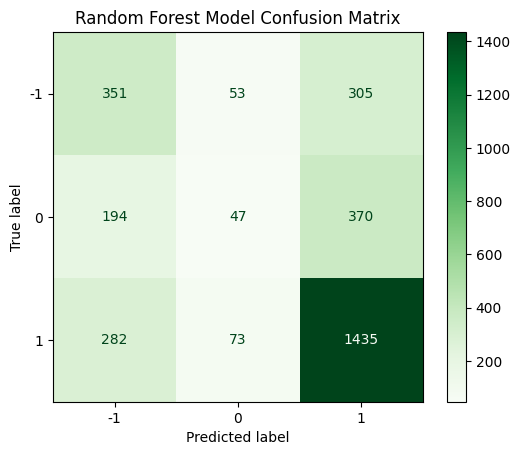

In [70]:
#Visualizing confusion matrix for Random Forest Model
metrics.ConfusionMatrixDisplay.from_predictions(y2_test, RFC_y_pred, cmap="Greens")
plt.title("Random Forest Model Confusion Matrix")
plt.show()

##### ii. XGB Classifier

In [63]:
tree_models_df['shipping_mode'] = tree_models_df['shipping_mode'].astype('int')
tree_models_df['customer_segment'] = tree_models_df['customer_segment'].astype('int')

In [71]:
tree_models_df['label'] = tree_models_df['label'].map({-1: 0, 0: 1, 1: 2})


X3 = tree_models_df[selected_features]
y3 = tree_models_df['label']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)
print(X3_train.shape, X3_test.shape)
print(y3_train.shape, y3_test.shape)

(12439, 15) (3110, 15)
(12439,) (3110,)


In [72]:
%%time
#XGB classifier
XGB_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', enable_categorical=True)
XGB_model.fit(X3_train, y3_train)

XGB_y_pred = XGB_model.predict(X3_test)
XGB_report = metrics.classification_report(y3_test, XGB_y_pred)
XGB_confusion_matrix = metrics.confusion_matrix(y3_test, XGB_y_pred)
XGB_accuracy = metrics.accuracy_score(y3_test, XGB_y_pred)
XGB_precision = metrics.precision_score(y3_test, XGB_y_pred, average='weighted')
XGB_recall = metrics.recall_score(y3_test, XGB_y_pred, average='weighted')
XGB_f1_score = metrics.f1_score(y3_test, XGB_y_pred, average='weighted')
print("Random Forest Classifier Model Report: ") 
print(XGB_report)
print("Random Forest Classifier Model Confusion Matrix: ")
print(XGB_confusion_matrix)
print("Random Forest Classifier Model Accuracy Score: ", XGB_accuracy)

C:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:56:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Random Forest Classifier Model Report: 
              precision    recall  f1-score   support

           0       0.43      0.54      0.48       709
           1       0.36      0.11      0.16       611
           2       0.69      0.79      0.74      1790

    accuracy                           0.60      3110
   macro avg       0.49      0.48      0.46      3110
weighted avg       0.57      0.60      0.57      3110

Random Forest Classifier Model Confusion Matrix: 
[[ 386   46  277]
 [ 199   65  347]
 [ 310   71 1409]]
Random Forest Classifier Model Accuracy Score:  0.5980707395498392
CPU times: total: 4.36 s
Wall time: 1.6 s


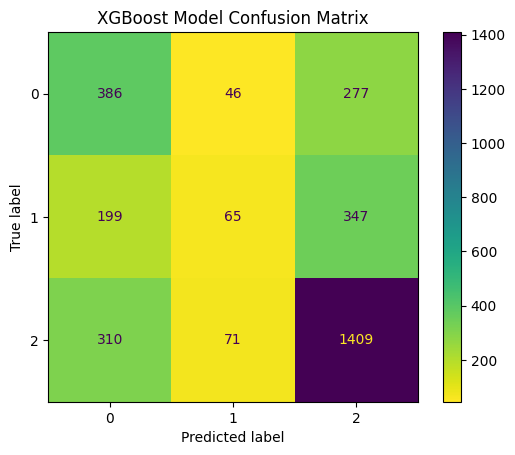

In [73]:
#Visualizing confusion matrix for XGBoost Model
metrics.ConfusionMatrixDisplay.from_predictions(y3_test, XGB_y_pred, cmap="viridis_r")
plt.title("XGBoost Model Confusion Matrix")
plt.show()

##### iv. Naive Bayes (Gaussian)

In [74]:
%%time
from sklearn.naive_bayes import GaussianNB
GNB_model = GaussianNB()
GNB_model.fit(X3_train, y3_train)

GNB_y_pred = GNB_model.predict(X3_test)
GNB_report = metrics.classification_report(y3_test, GNB_y_pred)
GNB_confusion_matrix = metrics.confusion_matrix(y3_test, GNB_y_pred)
GNB_accuracy = metrics.accuracy_score(y3_test, GNB_y_pred)
GNB_precision = metrics.precision_score(y3_test, GNB_y_pred, average='macro')
GNB_recall = metrics.recall_score(y3_test, GNB_y_pred, average='macro')
GNB_f1_score = metrics.f1_score(y3_test, GNB_y_pred, average='macro')
print("Naive Bayes (Gaussian) Model Report: ") 
print(GNB_report)
print("Naive Bayes (Gaussian) Model Confusion Matrix: ")
print(GNB_confusion_matrix)
print("Naive Bayes (Gaussian) Model Accuracy Score: ", GNB_accuracy)

Naive Bayes (Gaussian) Model Report: 
              precision    recall  f1-score   support

           0       0.40      0.95      0.56       709
           1       0.22      0.04      0.06       611
           2       0.81      0.60      0.69      1790

    accuracy                           0.57      3110
   macro avg       0.48      0.53      0.44      3110
weighted avg       0.60      0.57      0.54      3110

Naive Bayes (Gaussian) Model Confusion Matrix: 
[[ 672    5   32]
 [ 374   22  215]
 [ 644   72 1074]]
Naive Bayes (Gaussian) Model Accuracy Score:  0.5684887459807074
CPU times: total: 78.1 ms
Wall time: 51.5 ms


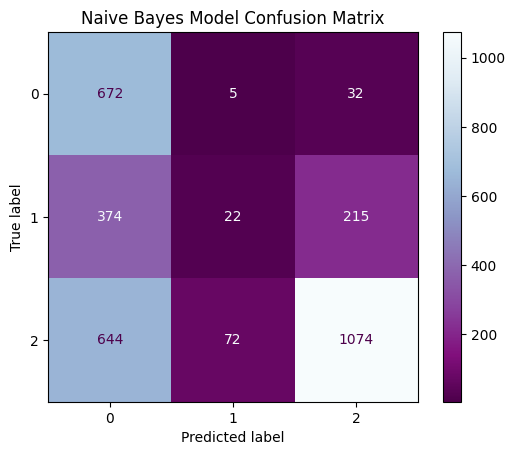

In [75]:
#Visualizing confusion matrix for Naive Bayes Model
metrics.ConfusionMatrixDisplay.from_predictions(y3_test, GNB_y_pred, cmap="BuPu_r")
plt.title("Naive Bayes Model Confusion Matrix")
plt.show()

In [76]:
data = {"Models": ["Logistic Regression", "Random Forest Classifier", "XGBost Classifier", "Gaussian Naive Bayes"],
            "Weighted Precision Score": [LogR_precision, RFC_precision, XGB_precision, GNB_precision],
            "Accuracy Score": [LogR_accuracy, RFC_accuracy, XGB_accuracy, GNB_accuracy],
            "Weighted F1 Score": [LogR_f1_score, RFC_f1_score, XGB_f1_score, GNB_f1_score],
            "Weighted Recall Score": [LogR_recall, RFC_recall, XGB_recall, GNB_recall]
           }
model_accuracy = pd.DataFrame(data)
model_accuracy

Models  Weighted Precision Score  Accuracy Score  \
0       Logistic Regression                  0.426824        0.570740   
1  Random Forest Classifier                  0.541570        0.589389   
2         XGBost Classifier                  0.567389        0.598071   
3      Gaussian Naive Bayes                  0.477625        0.568489   

   Weighted F1 Score  Weighted Recall Score  
0           0.468291               0.570740  
1           0.551302               0.589389  
2           0.566188               0.598071  
3           0.437553               0.527940

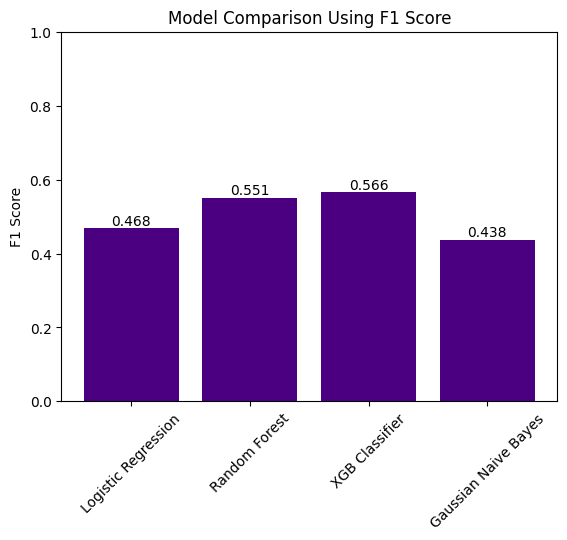

In [77]:
#Visualizing the F1 scores of the three models
f1_scores = {"Logistic Regression": LogR_f1_score, "Random Forest": RFC_f1_score, "XGB Classifier": XGB_f1_score, "Gaussian Naive Bayes": GNB_f1_score}

bars = plt.bar(f1_scores.keys(), f1_scores.values(), color="indigo")
plt.title("Model Comparison Using F1 Score")
plt.ylabel("F1 Score")
plt.xticks(rotation=45)
plt.ylim(0, 1)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.3f}', ha='center', va='bottom')
plt.show()

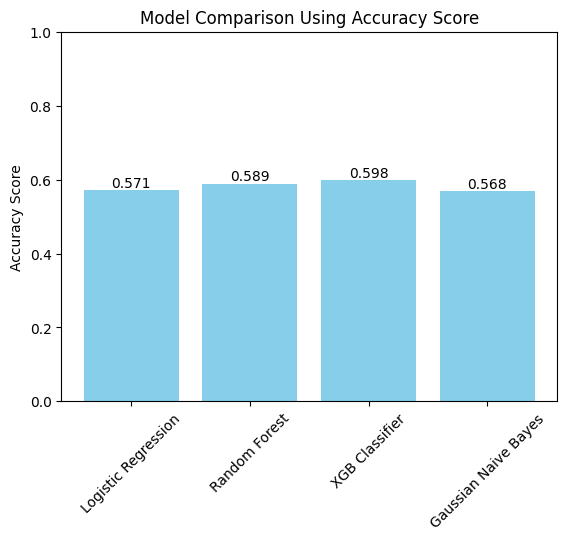

In [78]:
#Visualizing the accuracy scores of the three models
accuracy_scores = {"Logistic Regression": LogR_accuracy, "Random Forest": RFC_accuracy, "XGB Classifier": XGB_accuracy, "Gaussian Naive Bayes": GNB_accuracy}

bars = plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color="skyblue")
plt.title("Model Comparison Using Accuracy Score")
plt.ylabel("Accuracy Score")
plt.xticks(rotation=45)
plt.ylim(0, 1)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.3f}', ha='center', va='bottom')
plt.show()

##### Notes on model performance:
* XGBoost Classifier model is the best model as it has the highest F1 and accuracy scores (0.566 and 0.598 respectively)
* Naive Bayes is the least performing model as it has the lowest F1 score and a low accuracy score (0.438 and 0.568 respectively)

### Model Optimization

In [79]:
#Optimizing the XGB Classifier model using hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1]
} #Defining parameter

xgb = XGBClassifier(objective='multi:softmax', num_class=3, use_label_encoder=False, eval_metric='mlogloss')

gridsearch = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='f1_macro', cv=3, verbose=1, n_jobs=-1) #Initializing GridSearchCV

gridsearch.fit(X3_train, y3_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


C:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:03:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constrain...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=3, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 1],
                         'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='f1_macro', verbose=1)

#### Best Model Evaluation

In [80]:
print("Best parameters found:", gridsearch.best_params_)

best_model = gridsearch.best_estimator_

y_pred = best_model.predict(X3_test)

best_model_report = metrics.classification_report(y3_test, y_pred)
best_model_confusion_matrix = metrics.confusion_matrix(y3_test, y_pred)
best_model_accuracy = metrics.accuracy_score(y3_test, y_pred)
best_model_precision = metrics.precision_score(y3_test, y_pred, average='macro')
best_model_recall = metrics.recall_score(y3_test, y_pred, average='macro')
best_model_f1_score = metrics.f1_score(y3_test, y_pred, average='macro')
print("Best Model Report: ") 
print(best_model_report)
print("Best Model Confusion Matrix: ")
print(best_model_confusion_matrix)
print("Best Model Accuracy Score: ", best_model_accuracy)
#print(metrics.classification_report(y3_test, y_pred))

Best parameters found: {'colsample_bytree': 1.0, 'gamma': 1, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
Best Model Report: 
              precision    recall  f1-score   support

           0       0.44      0.72      0.54       709
           1       0.49      0.06      0.11       611
           2       0.74      0.77      0.75      1790

    accuracy                           0.62      3110
   macro avg       0.56      0.52      0.47      3110
weighted avg       0.62      0.62      0.58      3110

Best Model Confusion Matrix: 
[[ 509    9  191]
 [ 273   37  301]
 [ 383   29 1378]]
Best Model Accuracy Score:  0.6186495176848874


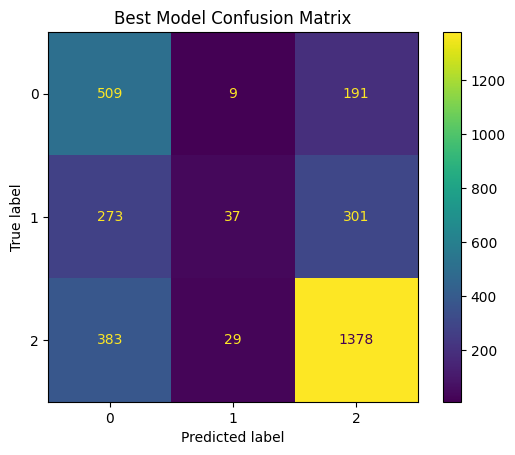

In [81]:
#Visualizing confusion matrix for the Best Model
metrics.ConfusionMatrixDisplay.from_predictions(y3_test, y_pred, cmap="viridis")
plt.title("Best Model Confusion Matrix")
plt.show()

#### Model Interpretation From Confusion Matrix
* Predicted Early(0)	 
* Predicted On-time (1)	 
* Predicted Late (2)

True Early      (0)	 |509	 |9    |191

True On-time    (1)	 |273	 |37   |301

True Late       (2)	 |383	 |29   |1378

#### Diagonal cells = Correct predictions
* Early classified as early: 509

* On-time classified as on-time: 37

* Late classified as late: 1378

#### Off-diagonal cells = Misclassifications
* 383 late orders were wrongly predicted as early

* 273 on-time orders were predicted as early

* 191 early orders were predicted as late

#### Interpretation & Evaluation
* Model is very good at predicting "Late" deliveries

* 1378 out of (1378+37+383) = ~76.6% accuracy for class 2

* Model struggles with On-time (label 1)

* Only 37 correct out of (273+37+301) = ~5.3% accuracy for class 1

* Most on-time are predicted as early or late

* Model moderately good at Early (label 0)

* 509 correct out of (509+9+191) = ~71.8% accuracy for class 0



## 6. INSIGHTS AND RECOMMENDATIONS
* Analyze feature importance and describe factors contributing to delivery delays.
* Write a summary report highlighting actionable recommendations to reduce delays.

### Analysing feature importance

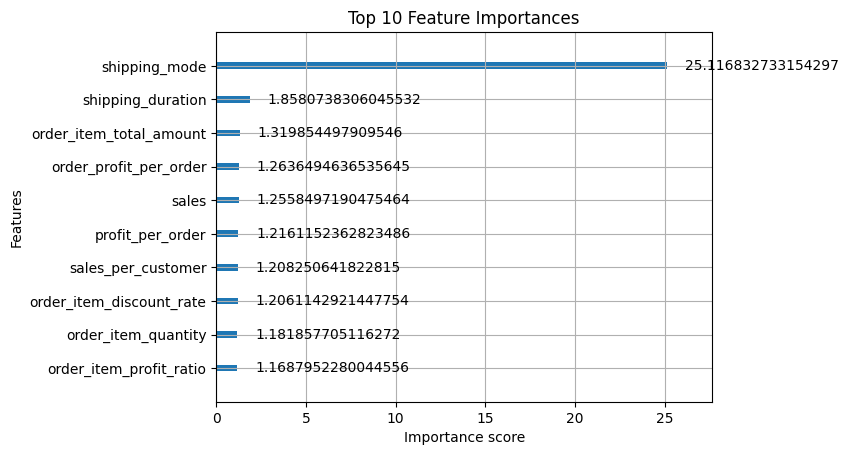

In [82]:
#Analysing feature importance
import xgboost as xgb
xgb.plot_importance(XGB_model, importance_type='gain', max_num_features=10, title='Top 10 Feature Importances')
plt.show()

#### Factors Contributing to Delivery Delay

1. Shipping Mode: This depends on the options available for shipping (Same day, first class, second class or standard class).
2. Shipping Duration: This is the number of hours betwen when the order was made and when the order was shipped.
3. Order Item Total Amount: This is the total amount of a customer's order.
4. Order Profit Per Order
5. Sales
6. Profit Per Order
7. Sales Per Customer
8. Order Item Discount Rate
9. Order Item Quantity
10. Order Item Profit Ratio

#### Summary Report: Reducing Delivery Delays
Project: Capstone Project 4 – Delivery Delay Prediction\
Analyst: Oghenetega Jarikre\
Model Used: XGBoost Classifier\
Top Predictive Features: shipping_mode, shipping_duration, order_item_total_amount, order_profit_per_order, order_item_discount_rate

##### Objective
To identify and address the key drivers of delivery delays using machine learning. This report presents actionable recommendations based on feature importance scores from the XGBoost model to reduce delayed deliveries and improve customer satisfaction.

##### Key Findings
The machine learning model highlighted the following factors as most predictive of delivery delays:

Rank and Feature Explanation
1. Shipping Mode: Strongest indicator of delay likelihood.
2. Shipping Duration: Longer durations significantly increase delays.
3. Order Item Total Amount: High-value orders may require additional handling.
4. Order Profit Per Order: Profit margins could influence fulfillment speed.
5. Sale: Higher sales influnce the speed of fulfilment.

##### Actionable Recommendations
1. Optimize Shipping Mode Selection
   
* Reevaluate shipping partners' performance per mode (standard, express, etc.).

* Offer customers estimated delivery times for each shipping mode.

* Introduce automated selection of faster modes for time-sensitive orders.

2. Improve Shipping Duration Management

* Analyze regions or routes with the longest shipping times.

* Consider adding or repositioning fulfillment centers to reduce transit distances.

* Use historical data to dynamically estimate shipping durations and notify customers proactively.

3. Prioritize High-Value Orders

* Introduce a tiered fulfillment strategy that fast-tracks high-value orders.

* Monitor handling time for large-value orders to avoid processing bottlenecks.

4. Monitor and Balance Profit-Based Fulfillment

* Ensure that low-profit orders are not systematically deprioritized.

* Adjust fulfillment policy to maintain service fairness regardless of order profit.

5. Control Over-Discounting During Promotions

* Improve demand forecasting and inventory management during large discount campaigns.

* Monitor stock levels closely for discounted items to avoid fulfillment lags.

##### Conclusion
Reducing delivery delays requires targeted operational changes in shipping strategies, order processing, and inventory management. Implementing these data-driven recommendations can significantly enhance delivery performance and customer satisfaction.